# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
#for installation of xgboost
!pip install xgboost

In [2]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
data=pd.read_csv("BankChurners.csv")

# save data into a version as a copy 
cards=data.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
cards.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [5]:
cards.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [6]:
cards.shape

(10127, 21)

In [7]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
cards.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [9]:
cards['Education_Level'].value_counts(dropna=False)

Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [10]:
cards['Marital_Status'].value_counts(dropna=False)

Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64

In [11]:
round(cards.isnull().sum() / cards.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

There are 1519 missing values for Education Level (15% missing value) and 749 Missing Values for Marital Status (7.4% missing value). It is possible that these variables have an impact on credit card churn, thus the mode will be used to replace these values. It will be unfeasible to drop these rows because of the rather high number of these rows. 

In [12]:
cards[(cards.Education_Level.isna())].describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1519.000,1519.000,1519.000,1519.000,1519.000,1519.000,1519.000,1519.000,1519.000,1519.000,1519.000,1519.000,1519.000,1519.000,1519.000
mean,740073978.573,46.429,2.361,35.860,3.798,2.311,2.458,8491.799,1160.450,7331.349,0.761,4420.053,64.746,0.713,0.276
std,36863041.187,7.957,1.330,7.917,1.590,1.032,1.124,9028.635,816.802,8995.377,0.214,3381.977,23.143,0.234,0.279
min,708083283.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,14.000,0.061,615.000,10.000,0.028,0.000
25%,713118745.500,41.000,1.000,32.000,3.000,2.000,2.000,2520.500,252.000,1240.000,0.629,2207.500,45.000,0.579,0.018
50%,718357458.000,47.000,2.000,36.000,4.000,2.000,2.000,4411.000,1270.000,3393.000,0.742,3872.000,67.000,0.707,0.171
75%,778237345.500,52.000,3.000,40.000,5.000,3.000,3.000,10709.500,1785.000,9577.000,0.862,4685.000,80.000,0.821,0.514
max,828281733.000,67.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,2.180,18484.000,139.000,2.571,0.992


In [13]:
cards[(cards.Education_Level.isna())].head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
11,710821833,Existing Customer,65,M,1,NaN,Married,$40K - $60K,Blue,54,6,2,3,9095.000,1587,7508.000,1.433,1314,26,1.364,0.174
15,714885258,Existing Customer,44,M,4,NaN,NaN,$80K - $120K,Blue,37,5,1,2,4234.000,972,3262.000,1.707,1348,27,1.700,0.230
17,753327333,Existing Customer,41,M,3,NaN,Married,$80K - $120K,Blue,34,4,4,1,13535.000,1291,12244.000,0.653,1028,21,1.625,0.095
23,811604133,Existing Customer,47,F,4,NaN,Single,Less than $40K,Blue,36,3,3,2,2492.000,1560,932.000,0.573,1126,23,0.353,0.626


In [14]:
cards[(cards.Marital_Status.isna())].describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,749.000,749.000,749.000,749.000,749.000,749.000,749.000,749.000,749.000,749.000,749.000,749.000,749.000,749.000,749.000
mean,740584061.972,45.569,2.538,35.190,3.761,2.323,2.418,9445.283,1157.749,8287.534,0.749,4720.005,67.147,0.715,0.256
std,37829864.757,6.864,1.266,7.212,1.626,1.039,1.065,9558.352,825.692,9585.015,0.191,3304.686,22.532,0.223,0.268
min,708095133.000,26.000,0.000,13.000,1.000,1.000,0.000,1438.300,0.000,111.000,0.018,647.000,15.000,0.077,0.000
25%,713058858.000,42.000,2.000,32.000,2.000,2.000,2.000,2699.000,0.000,1438.300,0.640,2494.000,49.000,0.582,0.000
50%,718388733.000,45.000,3.000,36.000,4.000,2.000,2.000,5222.000,1261.000,3983.000,0.734,4182.000,69.000,0.707,0.150
75%,778275783.000,49.000,3.000,39.000,5.000,3.000,3.000,12778.000,1793.000,11350.000,0.856,4887.000,82.000,0.815,0.470
max,828343083.000,65.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,2.204,16732.000,131.000,2.333,0.958


In [15]:
cards[(cards.Marital_Status.isna())].head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
10,708790833,Existing Customer,42,M,5,Uneducated,NaN,$120K +,Blue,31,5,3,2,6748.000,1467,5281.000,0.831,1201,42,0.680,0.217
13,816082233,Existing Customer,35,M,3,Graduate,NaN,$60K - $80K,Blue,30,5,1,3,8547.000,1666,6881.000,1.163,1311,33,2.000,0.195
15,714885258,Existing Customer,44,M,4,NaN,NaN,$80K - $120K,Blue,37,5,1,2,4234.000,972,3262.000,1.707,1348,27,1.700,0.230


There are no predictable patterns for which rows have the missing values for Education_Level and Marital_Status.
The missing values will be imputed when splitting the data into test, training and validation at the later stage. 
They will be imputed with the most frequently occuring values for  Education_Level and Marital_Status variables. 

In [16]:
# checking for duplicate observations
cards.duplicated().sum()

0

There are no duplicate observation in data set. 

In [17]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

There are 10127 unique values of CLIENTNUM, so it will be dropped. It will not value add to the model. 

In [18]:
#Dropping CLIENTNUM column from the dataframe
cards.drop(columns=['CLIENTNUM'], inplace=True)

In [19]:
cards.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [22]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [24]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [25]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [26]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

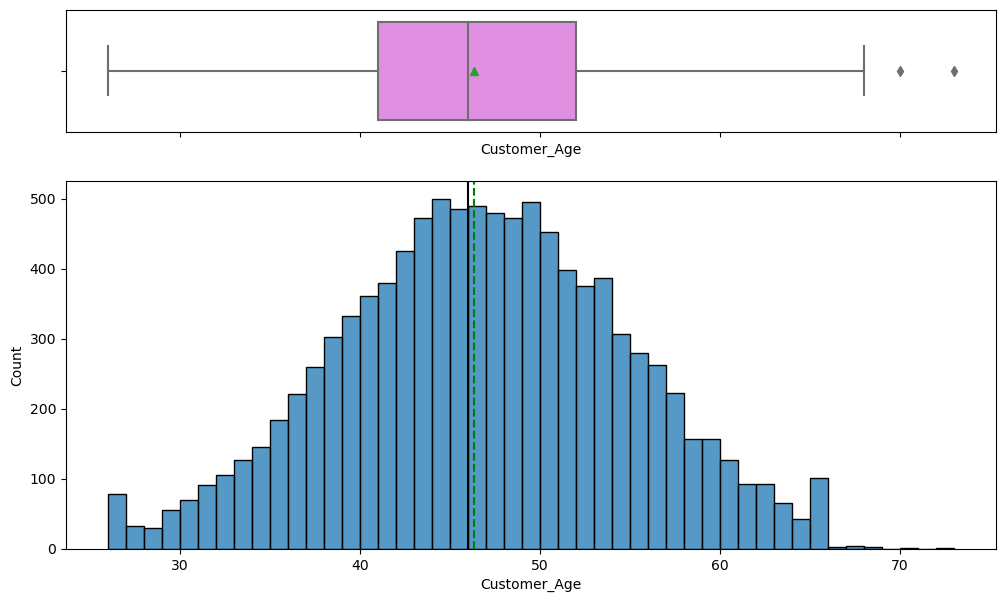

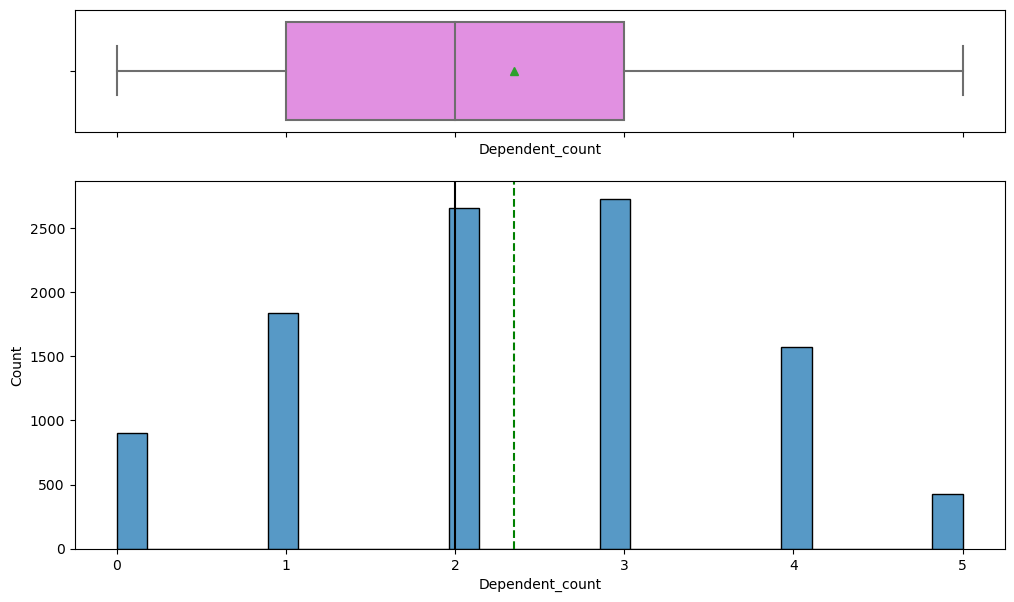

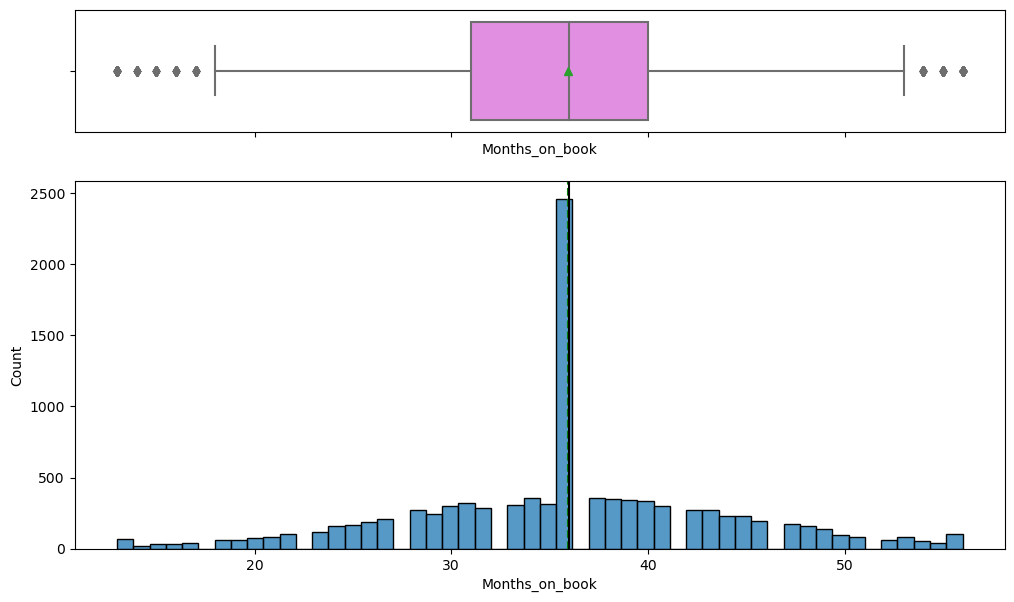

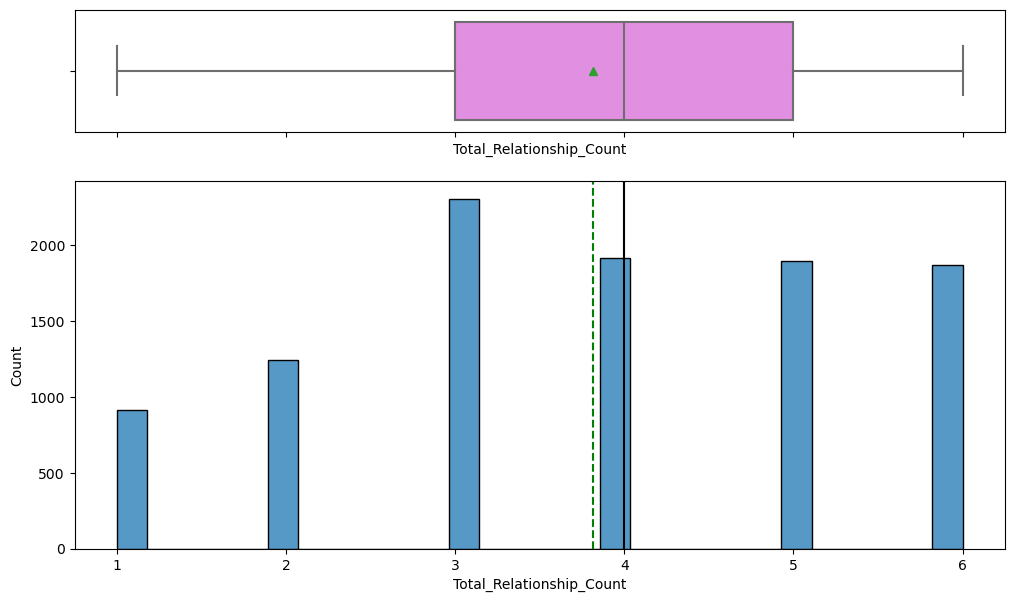

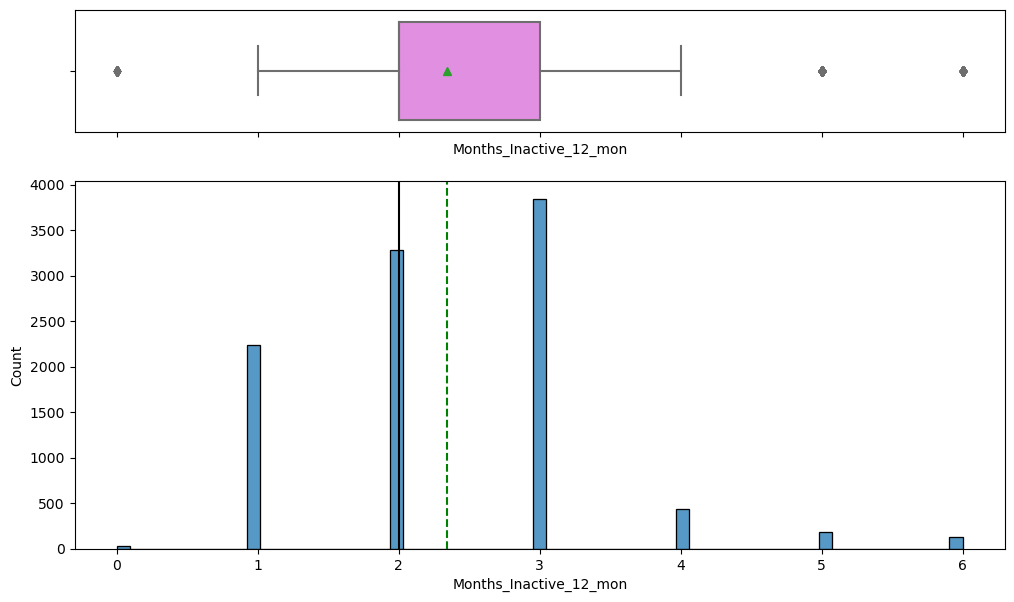

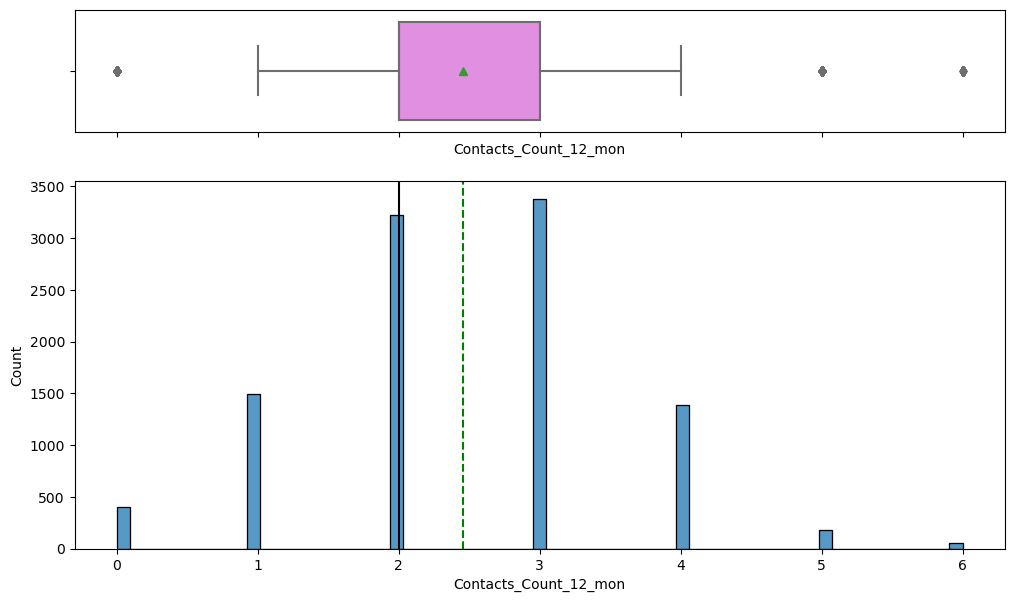

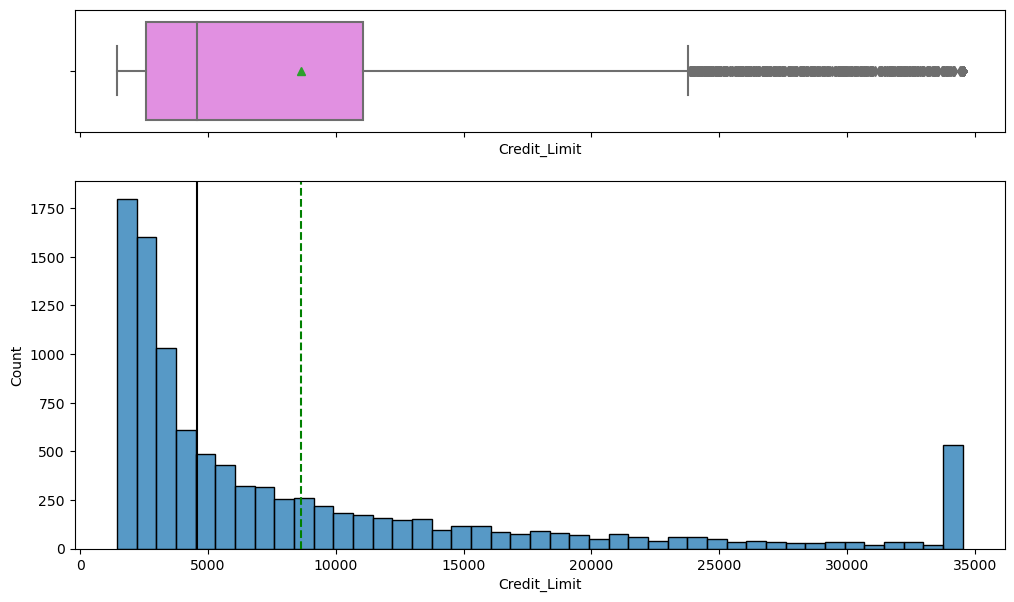

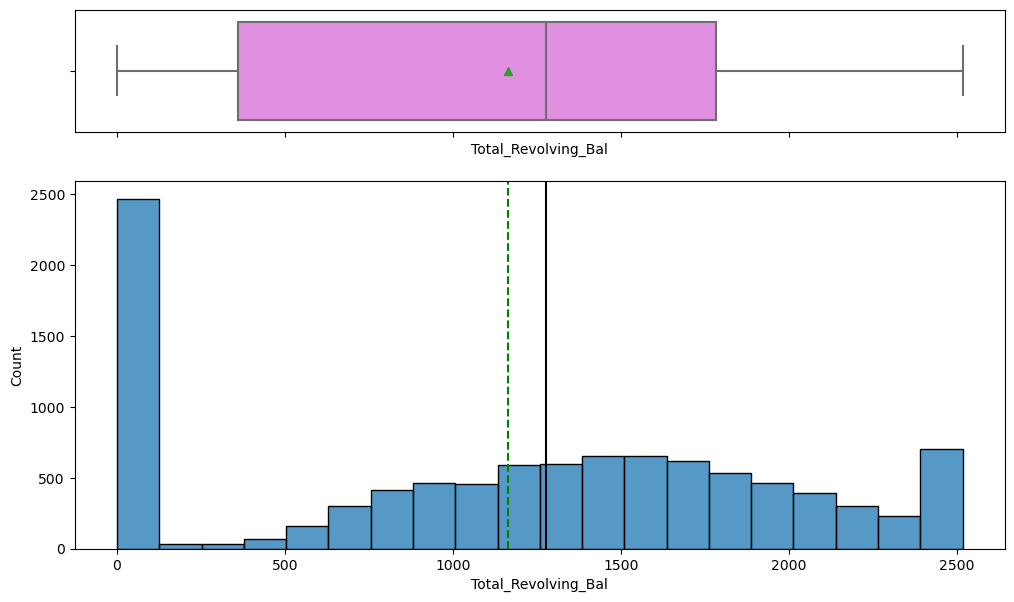

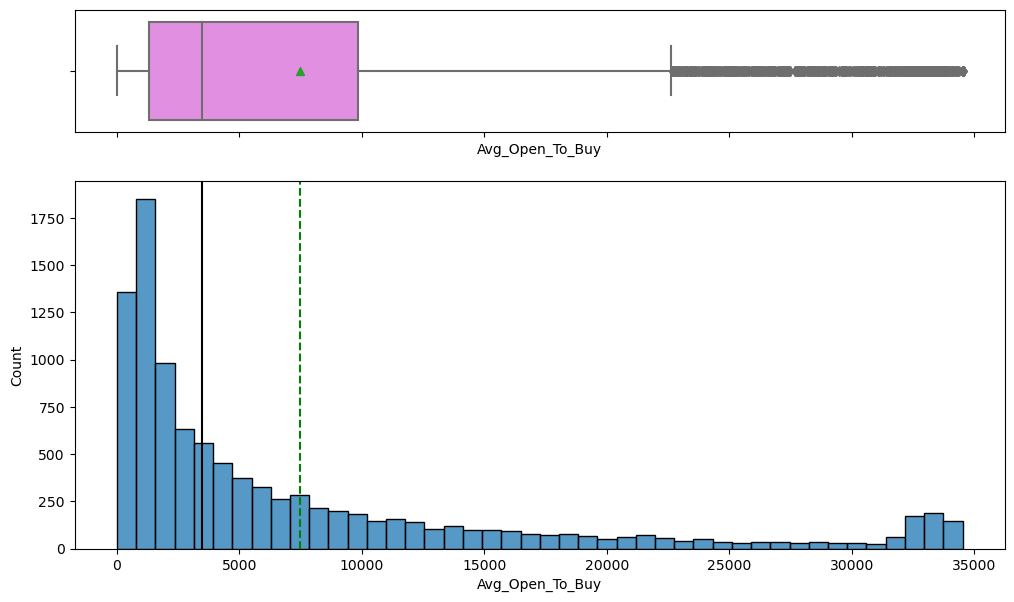

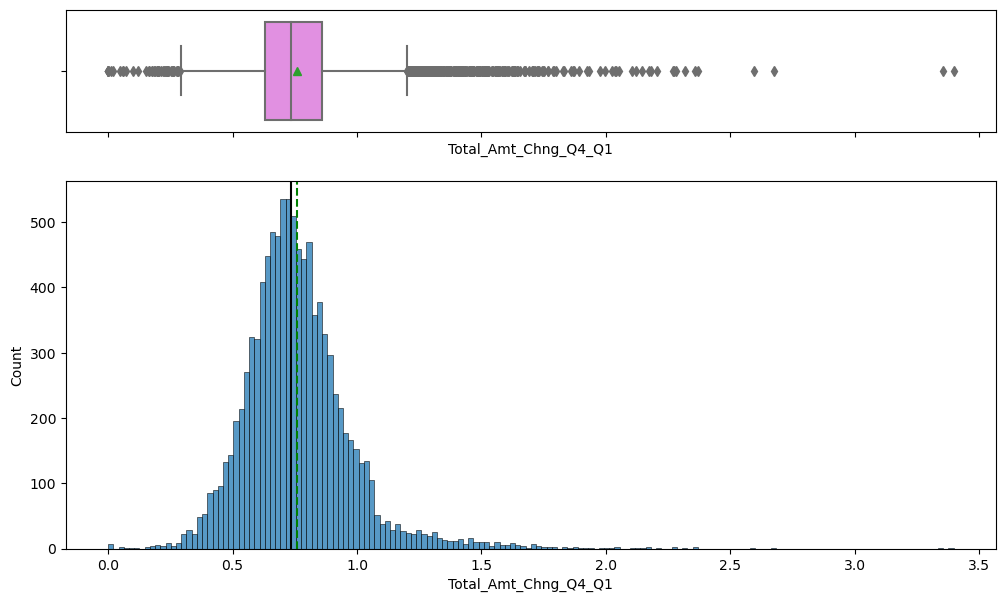

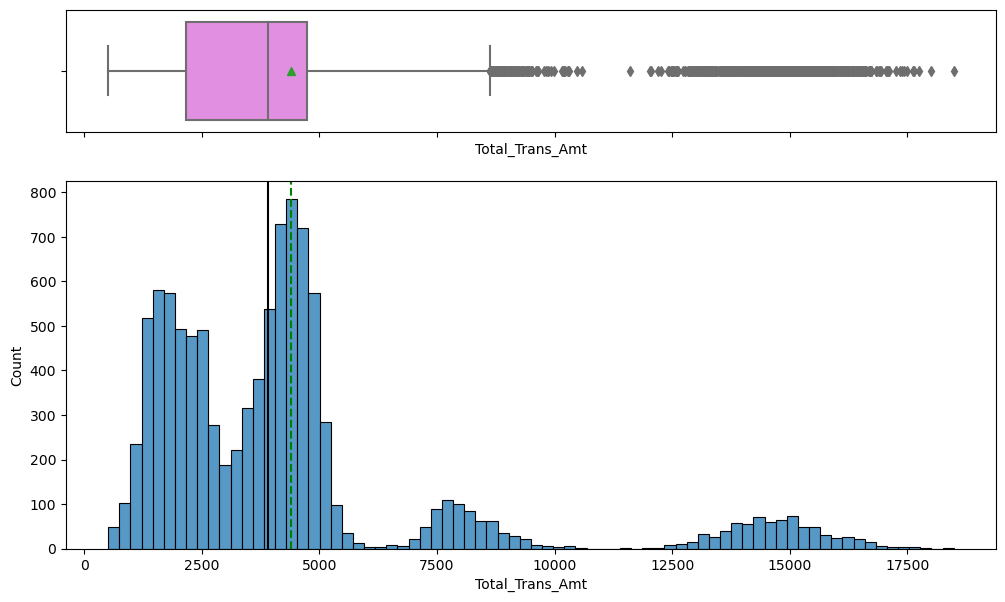

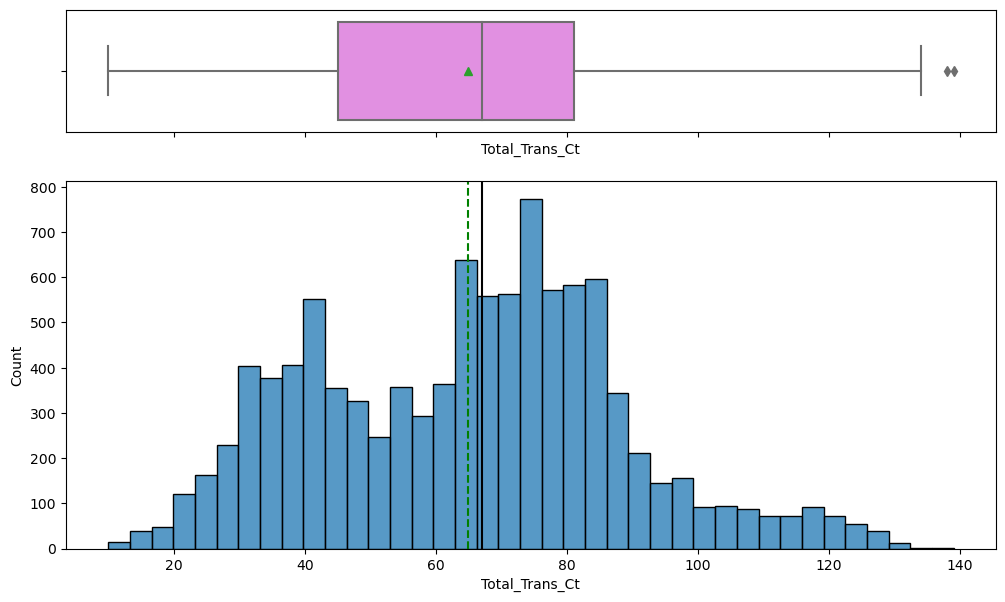

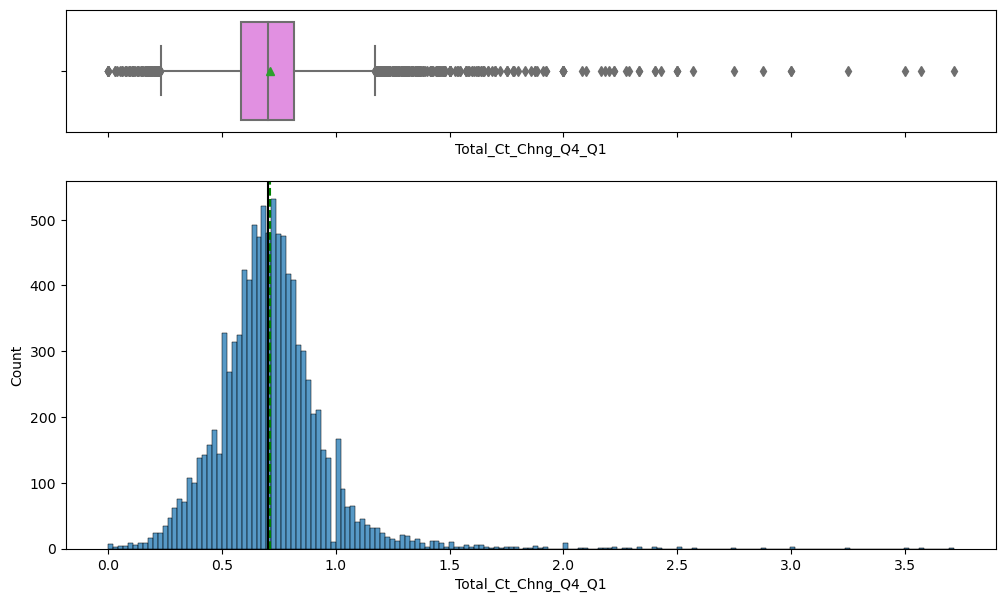

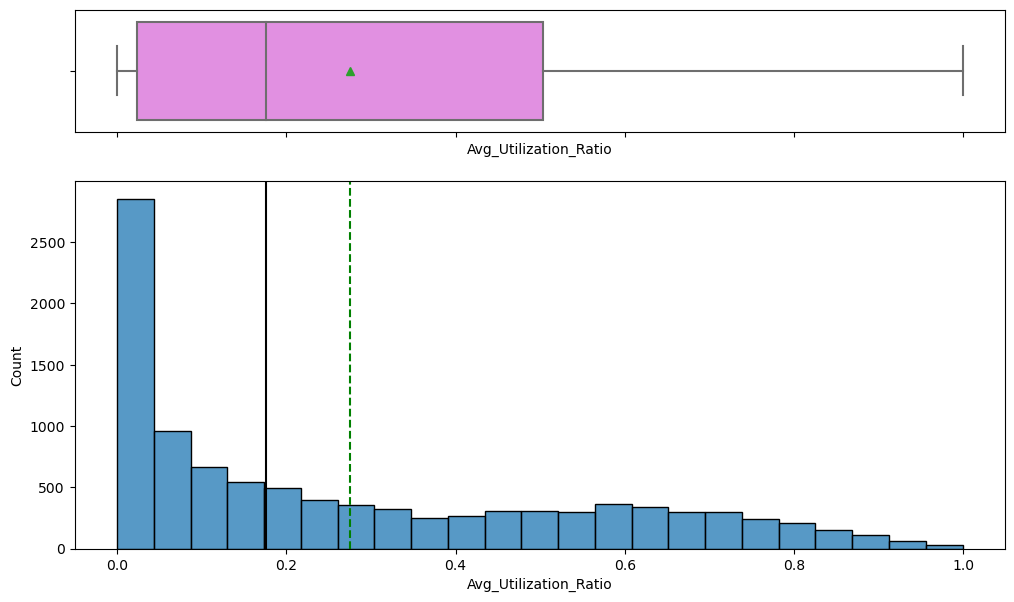

In [27]:
continuous_variables = ['Customer_Age', 'Dependent_count', 
                        'Months_on_book', 'Total_Relationship_Count', 
                        'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
                        'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                        'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct',
                        'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

for continuous in continuous_variables:
    histogram_boxplot(data, continuous)

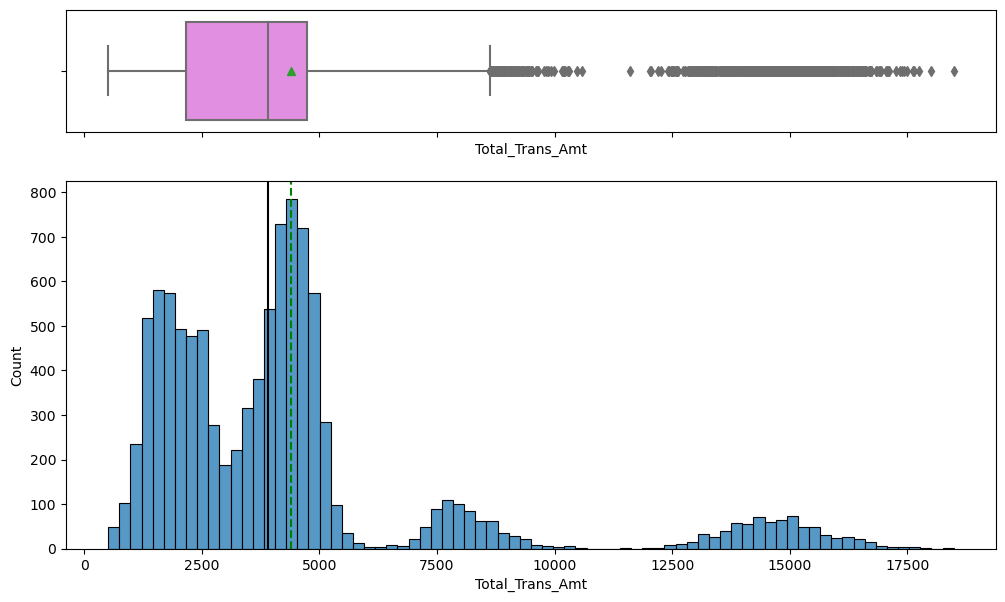

In [28]:
histogram_boxplot(data, 'Total_Trans_Amt')

Question 1 answer: The variable Total_Trans_Amt is distributed in a non-normal distribution pattern. This is seen in the two higher peaks and two lower-sized peaks in the data over the range 500 - 17500. The average of the values lie around the value 4500, while the median of the values lie around 4000. This indicates that the data is right skewed with outliers to the right, thereby raising the average values of the entire variable set. 

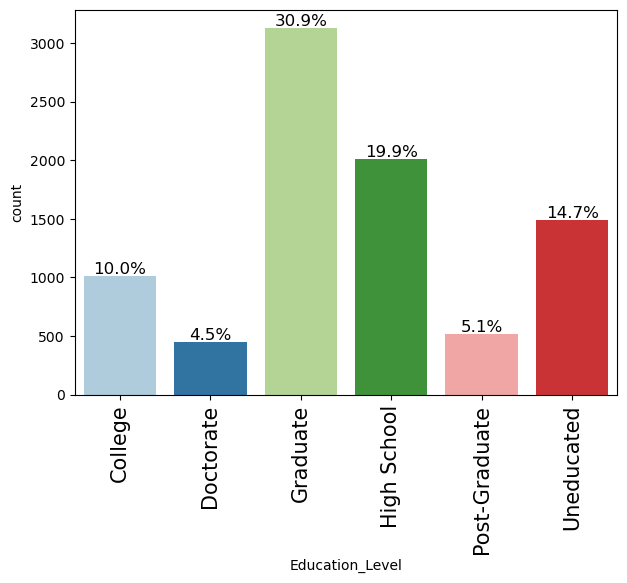

In [29]:
labeled_barplot(data, 'Education_Level', perc = True)

- The top six groups of customers by education are: Graduate (30.9%), High School (19.9%), Uneducated (14.7%), College (10.0%), Post-Graduate (5.1%) and Doctorate (4.5%) .

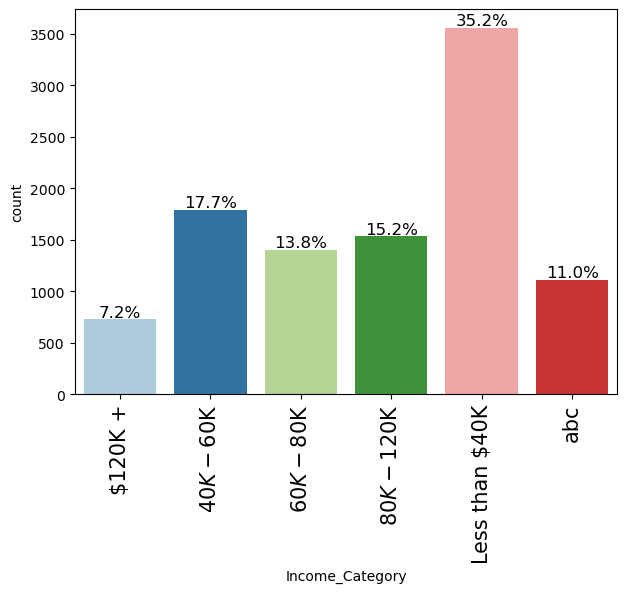

In [30]:
labeled_barplot(data, 'Income_Category', perc = True)

- The top six groups of customers by income are: Less than dollars 40k (35.2%), dollars 40k-60k (17.7%), dollars 80k-120k (15.2%), dollars 60k-80k (13.8%), dollars abc (11.0%) and dollars 120k+ (7.2%) .

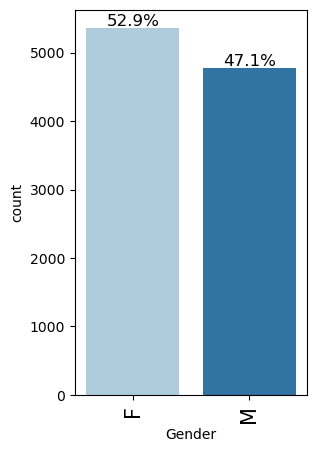

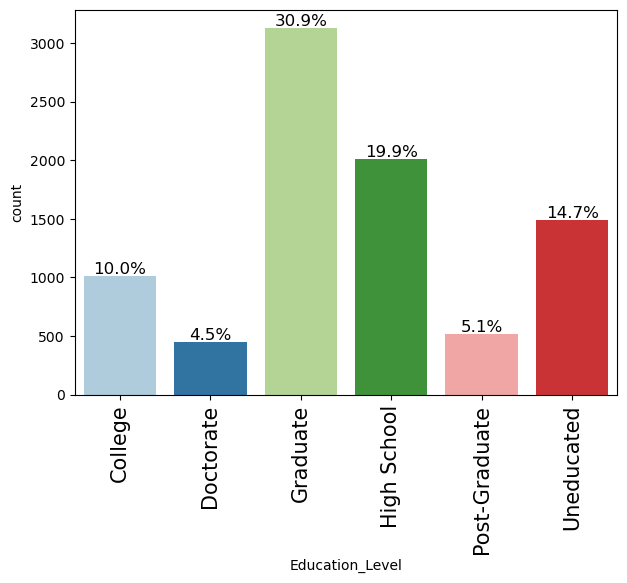

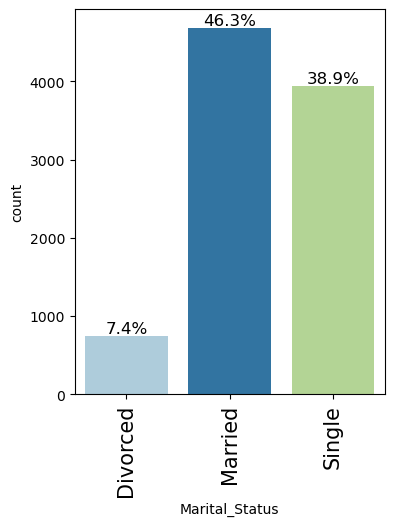

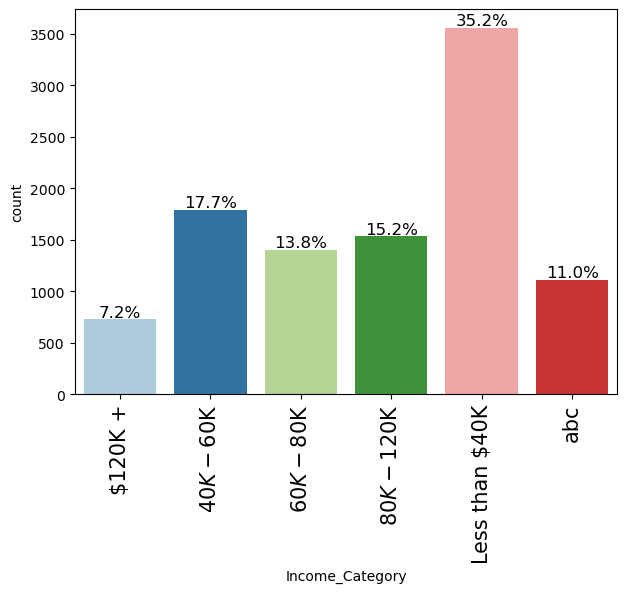

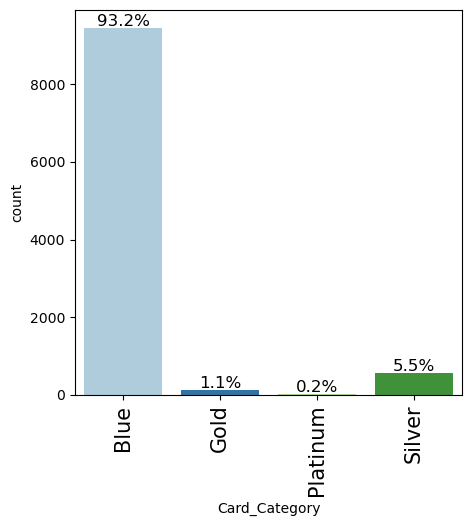

In [31]:
categorical_variables = ['Gender', 'Education_Level', 
                        'Marital_Status', 'Income_Category', 
                        'Card_Category']

for categorical in categorical_variables:
    labeled_barplot(data, categorical,perc=True)

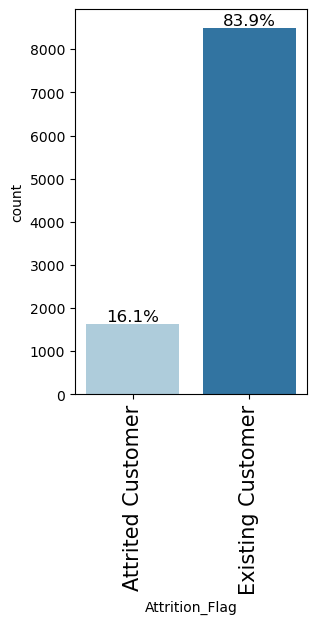

In [32]:
labeled_barplot(data,'Attrition_Flag',perc=True)

There is over representation of Existing Customer (83.9%), compared to Attrited Customer (16.1%). This could bias the model prediction to predict accurately for existing customers, rather than attrited customers. Therefore, the models later utilise oversampled and undersampled data to correct for this bias in predicting. 

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


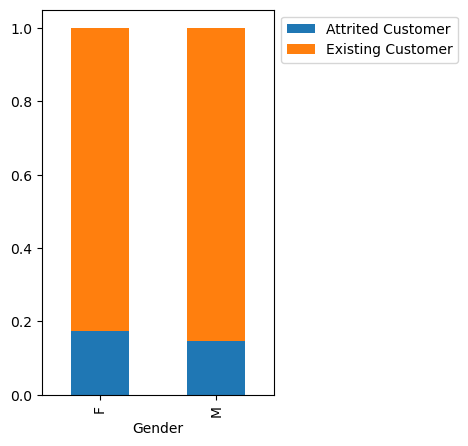

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


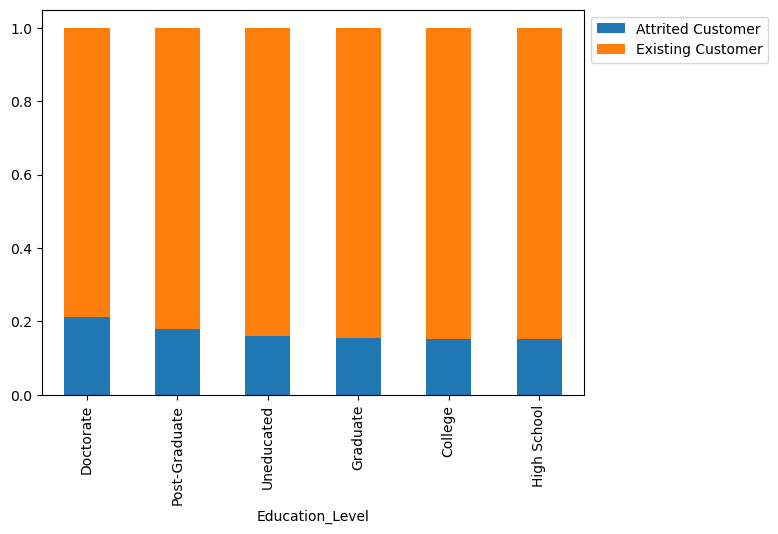

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


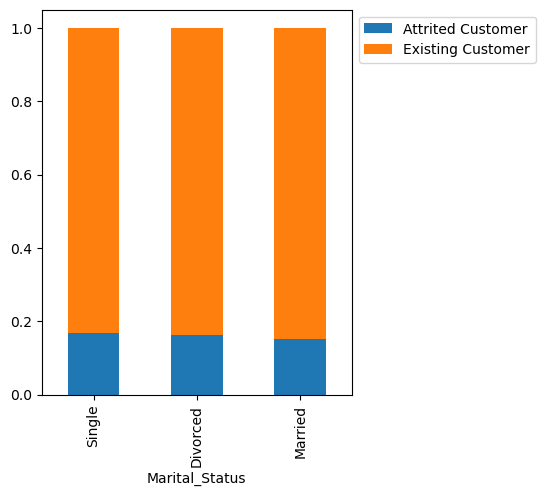

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


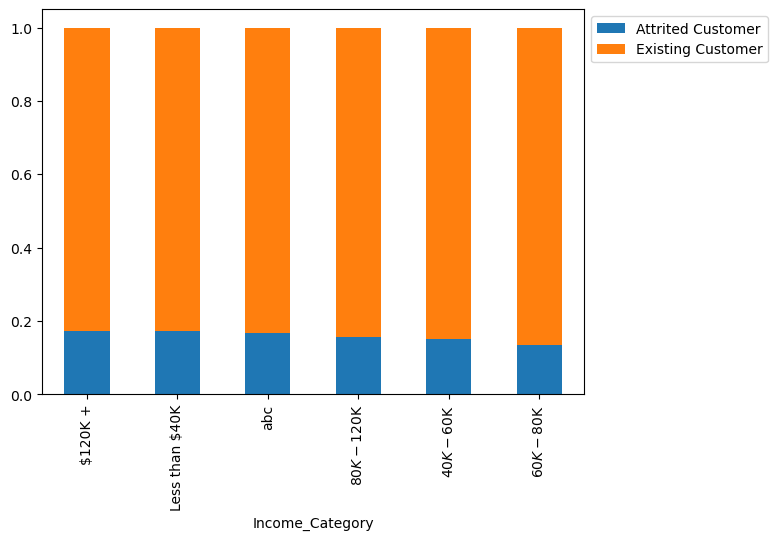

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


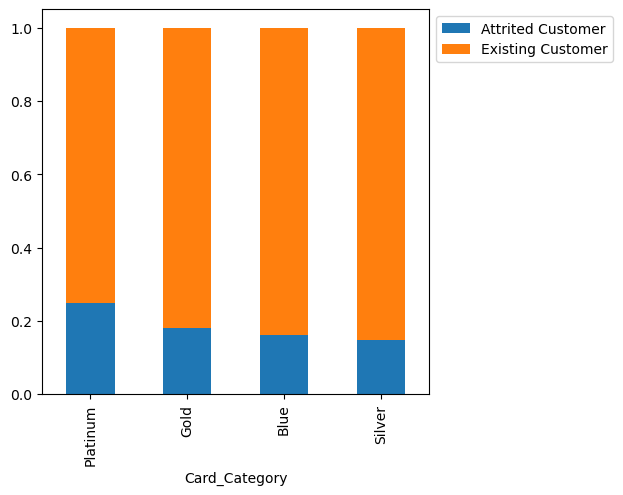

In [33]:
categorical_variables = ['Gender', 'Education_Level', 
                        'Marital_Status', 'Income_Category', 
                        'Card_Category']

for categorical in categorical_variables:
    stacked_barplot(data,categorical,"Attrition_Flag")
    



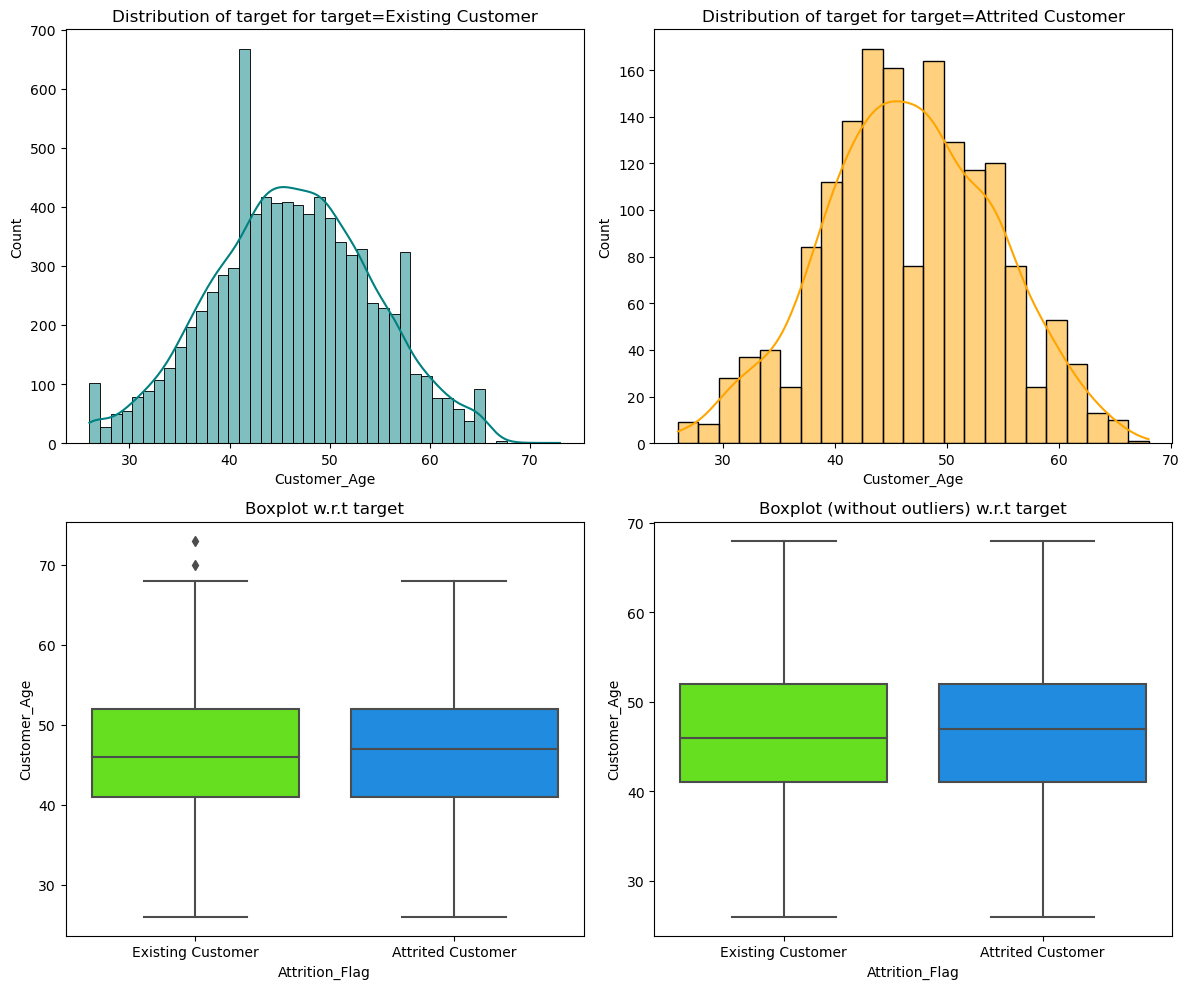

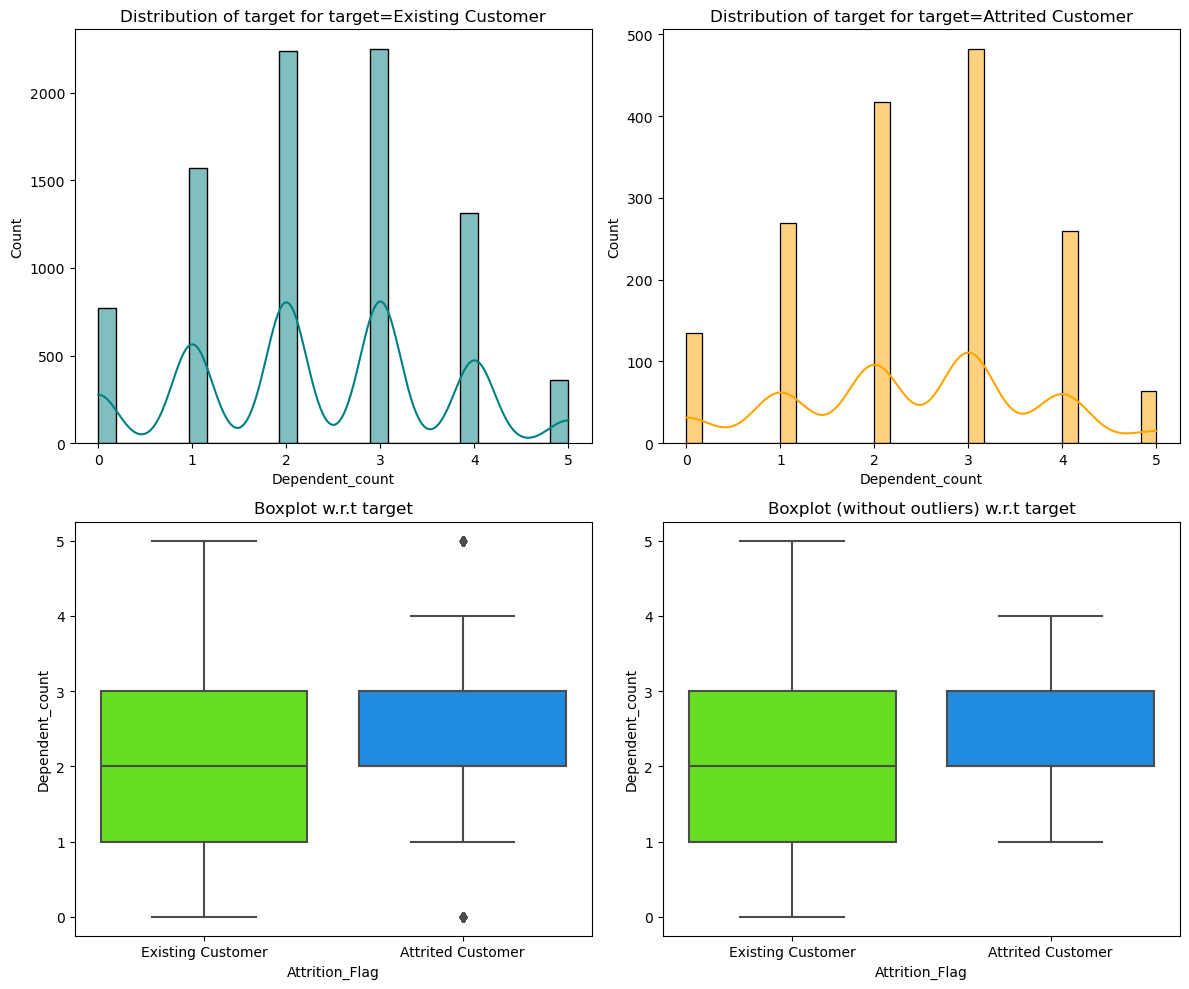

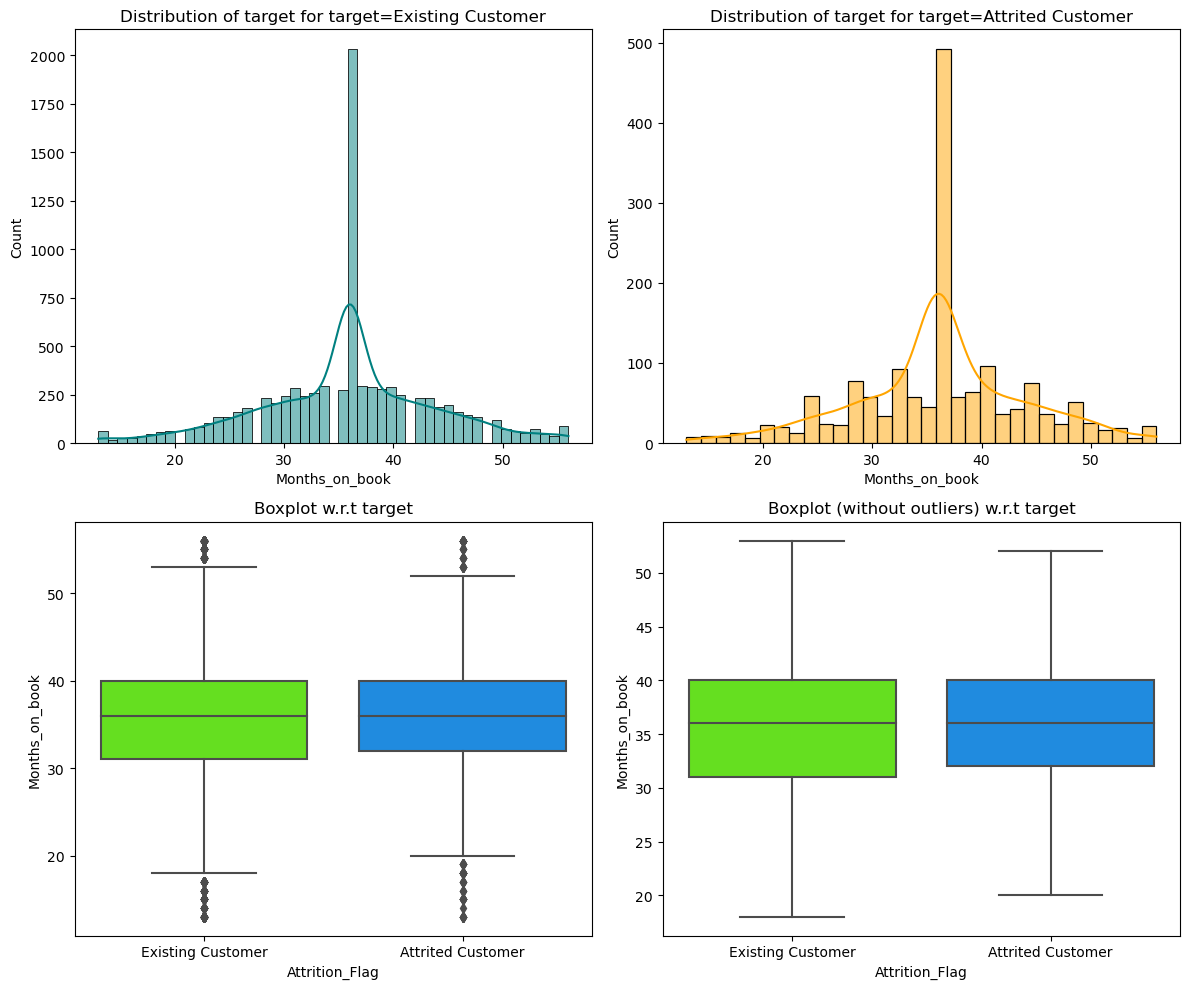

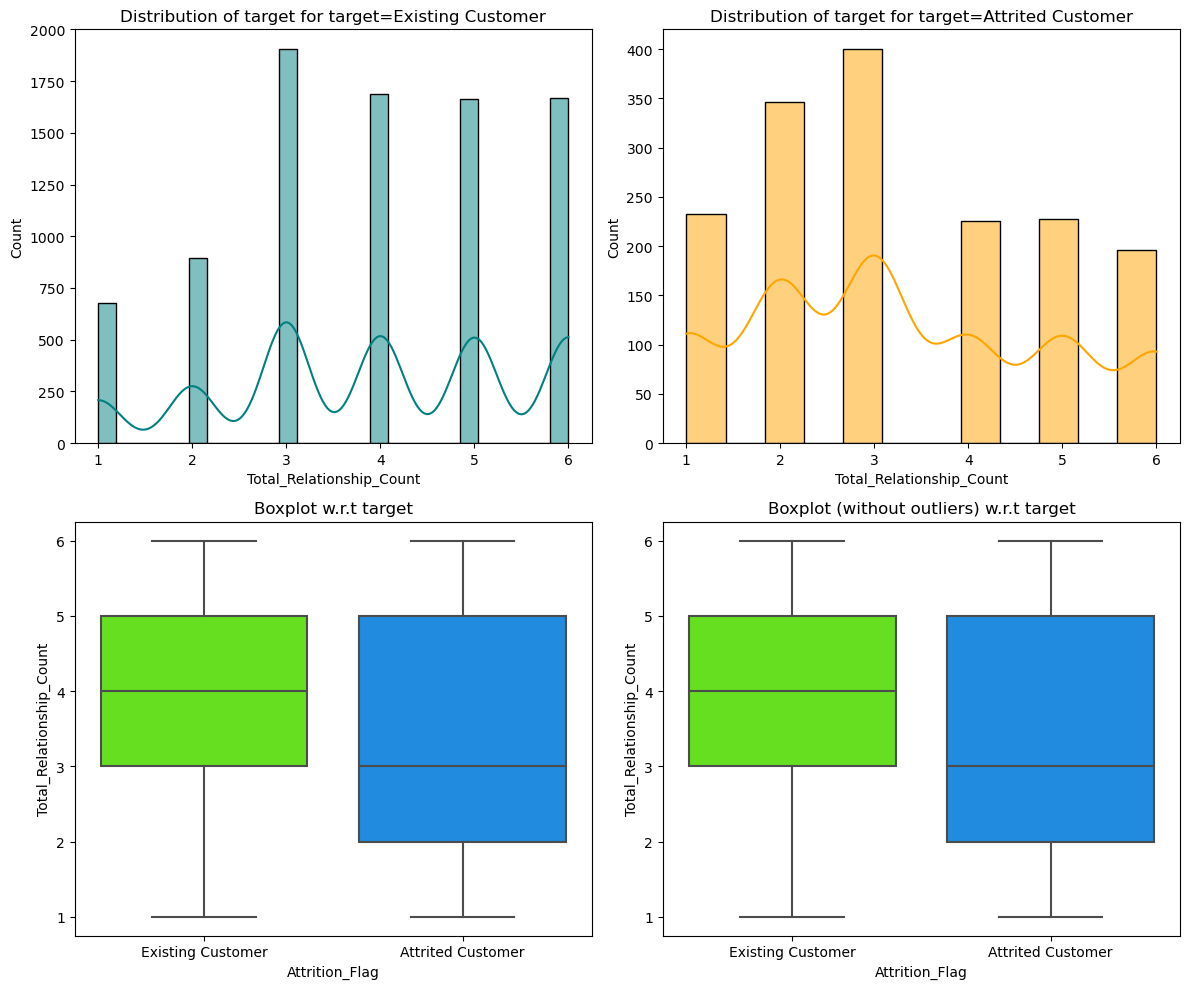

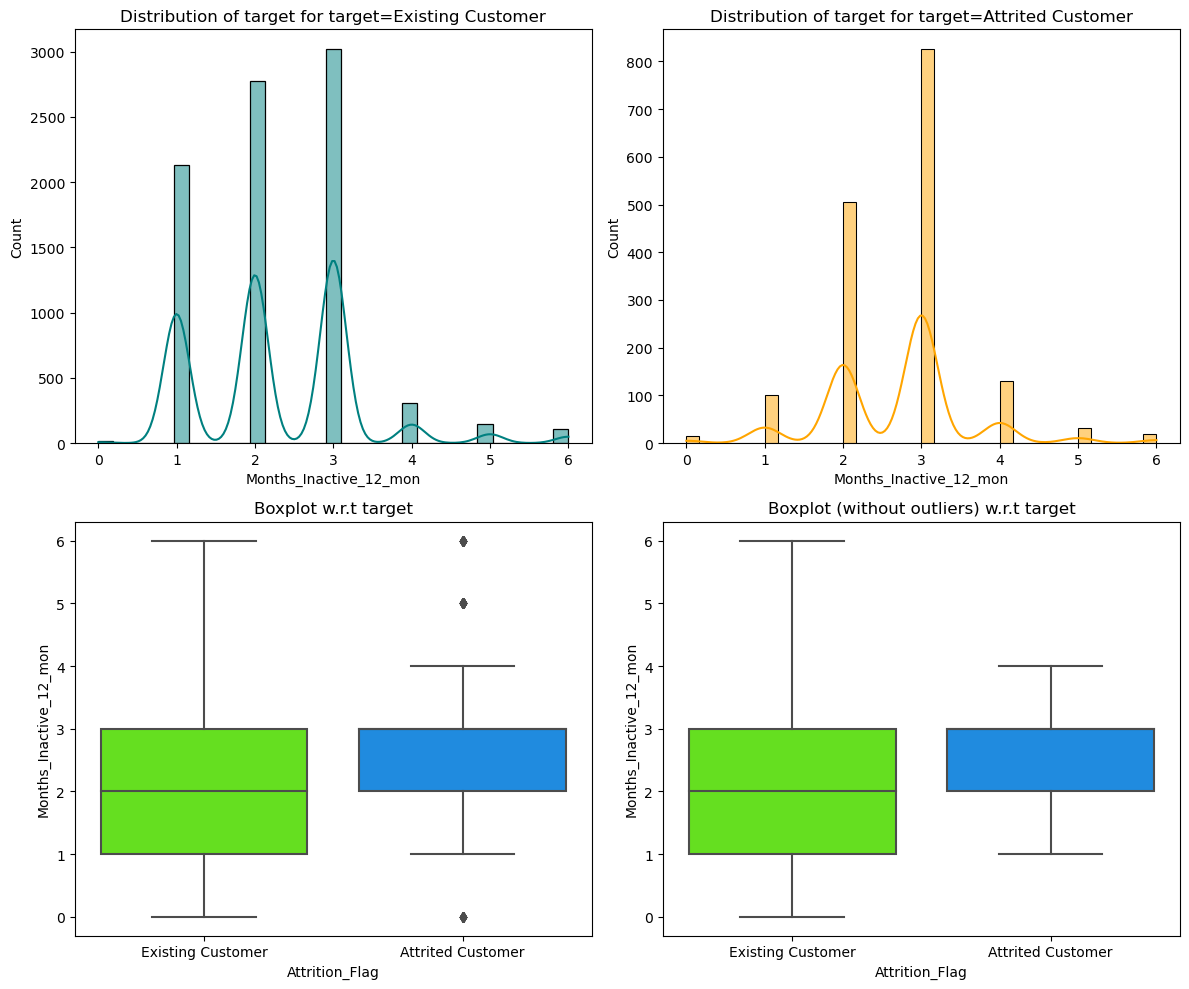

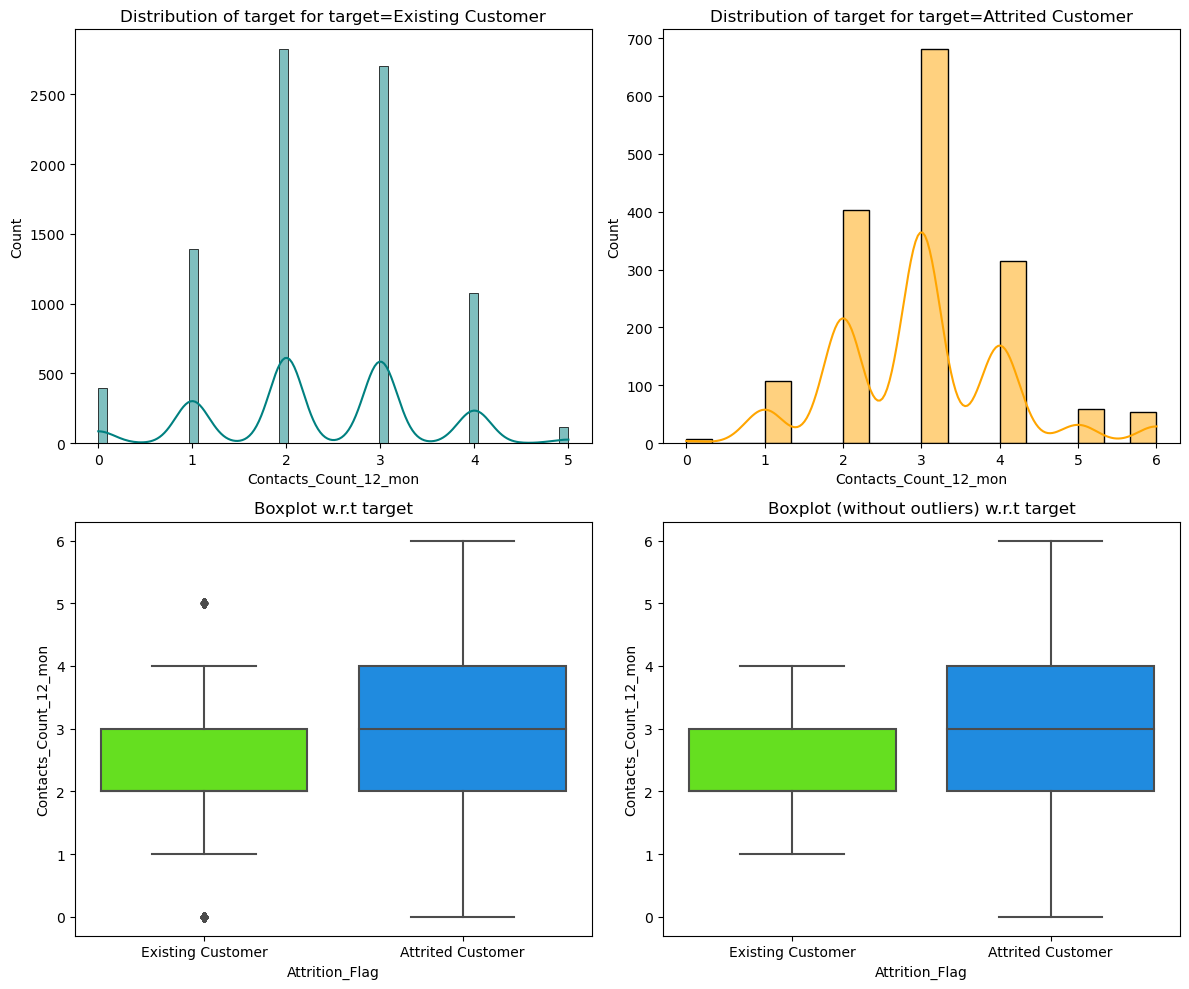

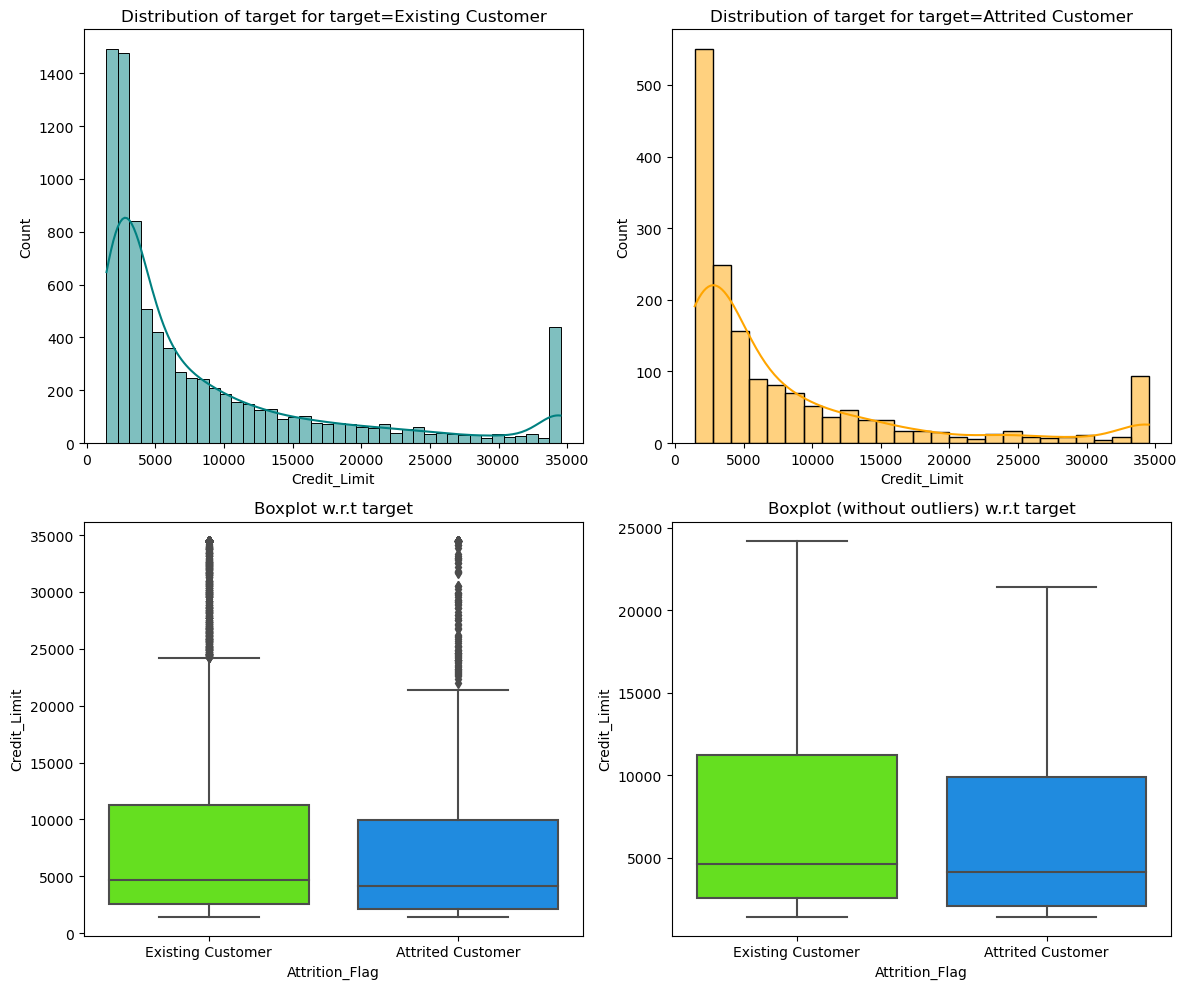

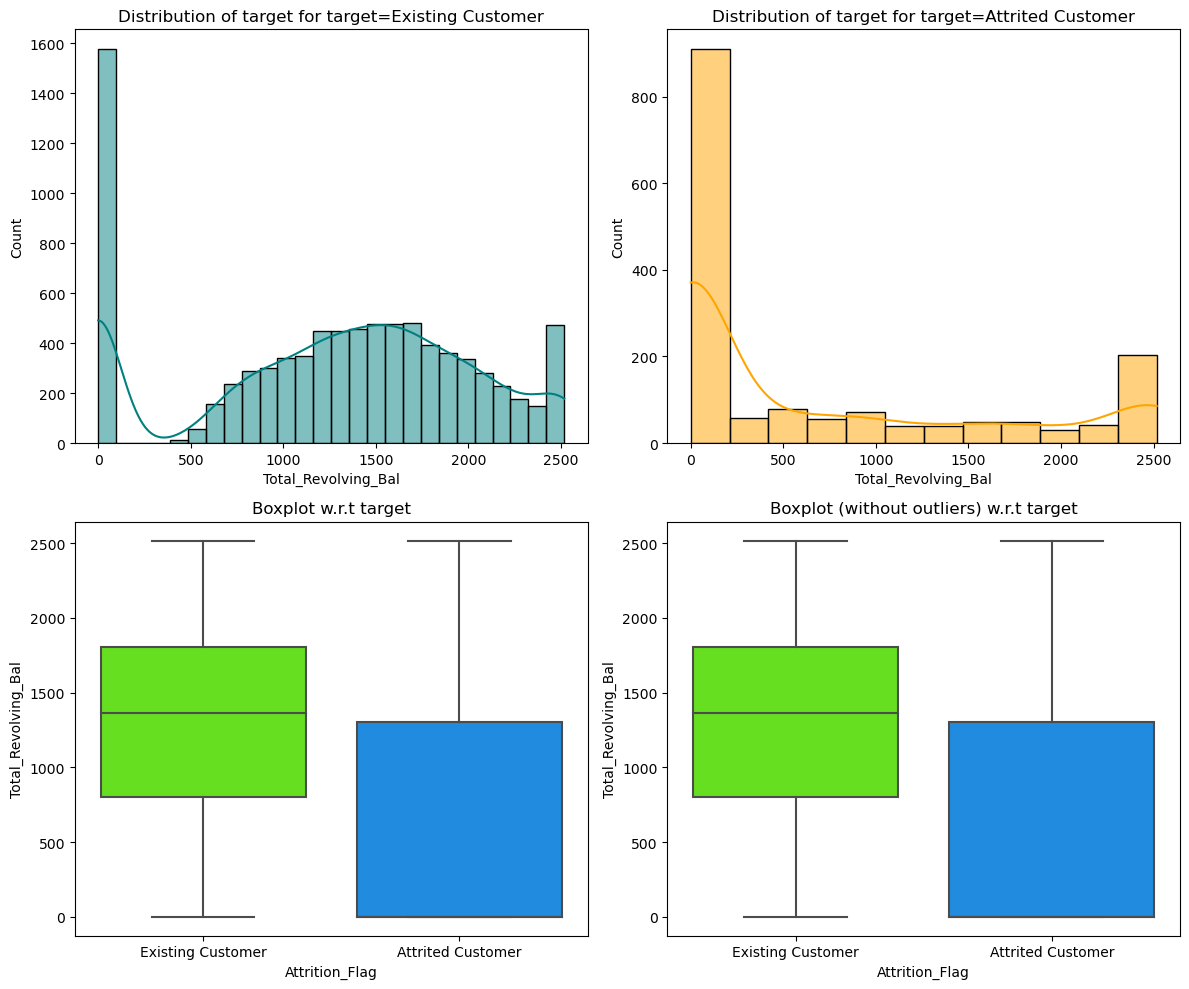

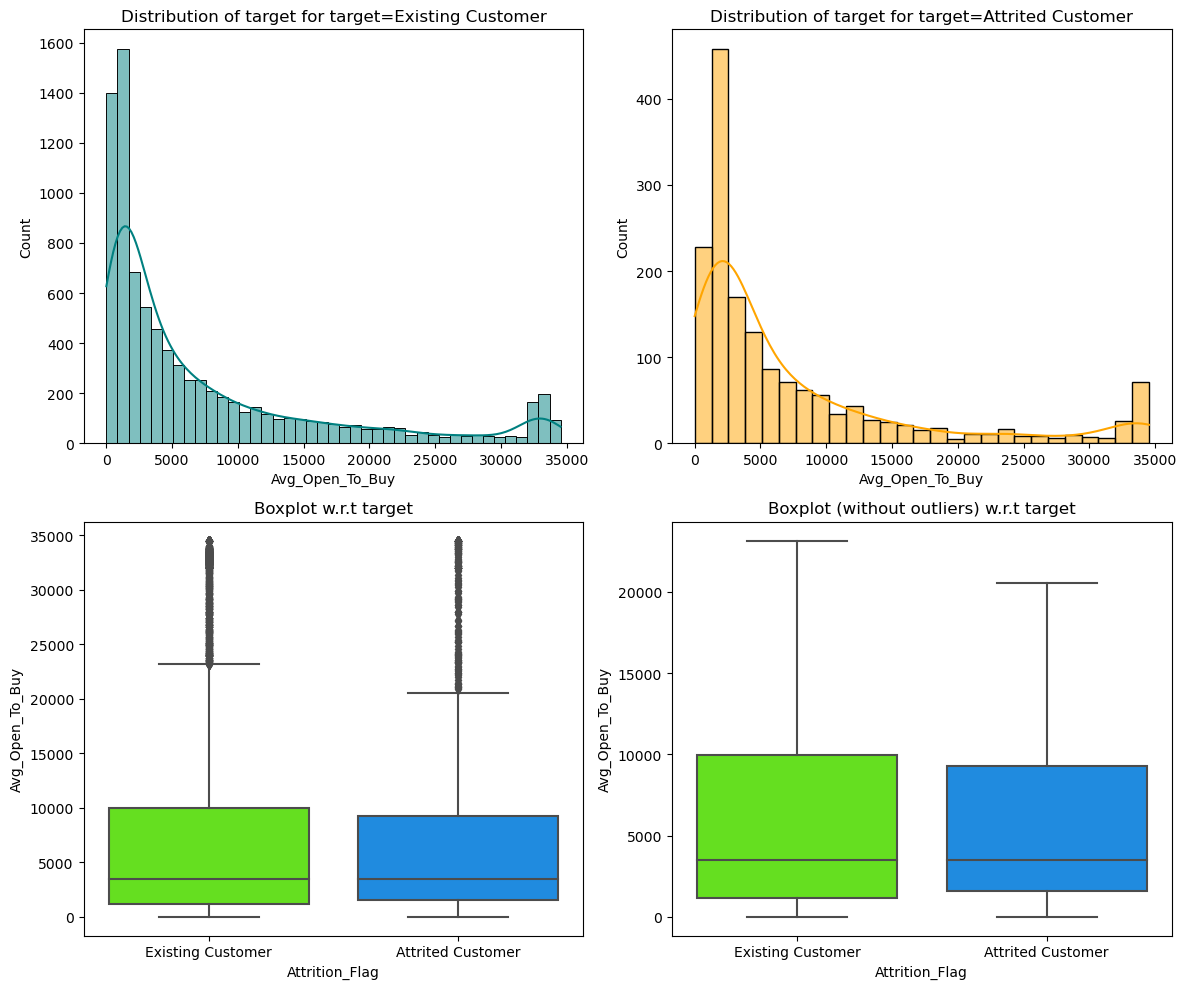

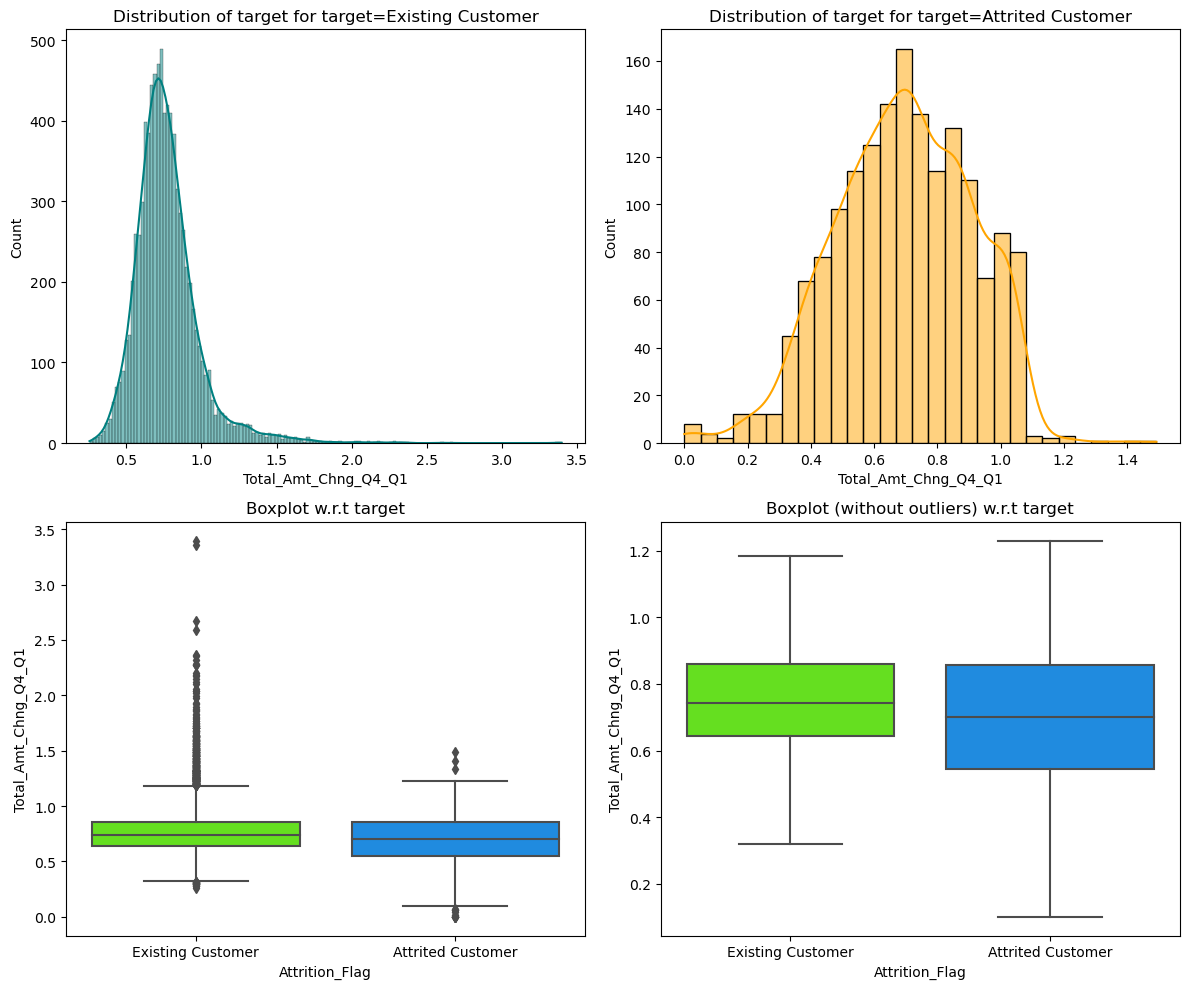

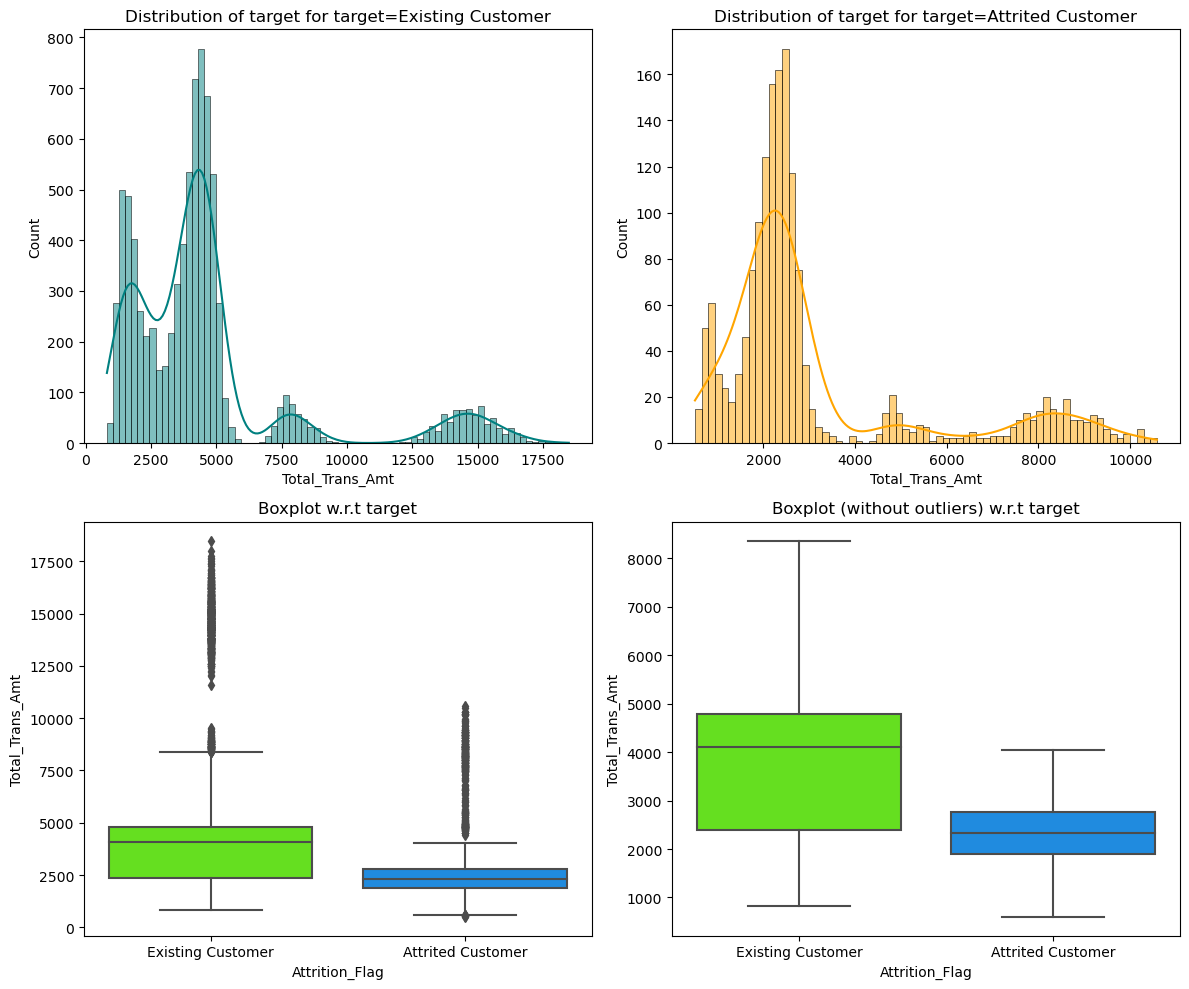

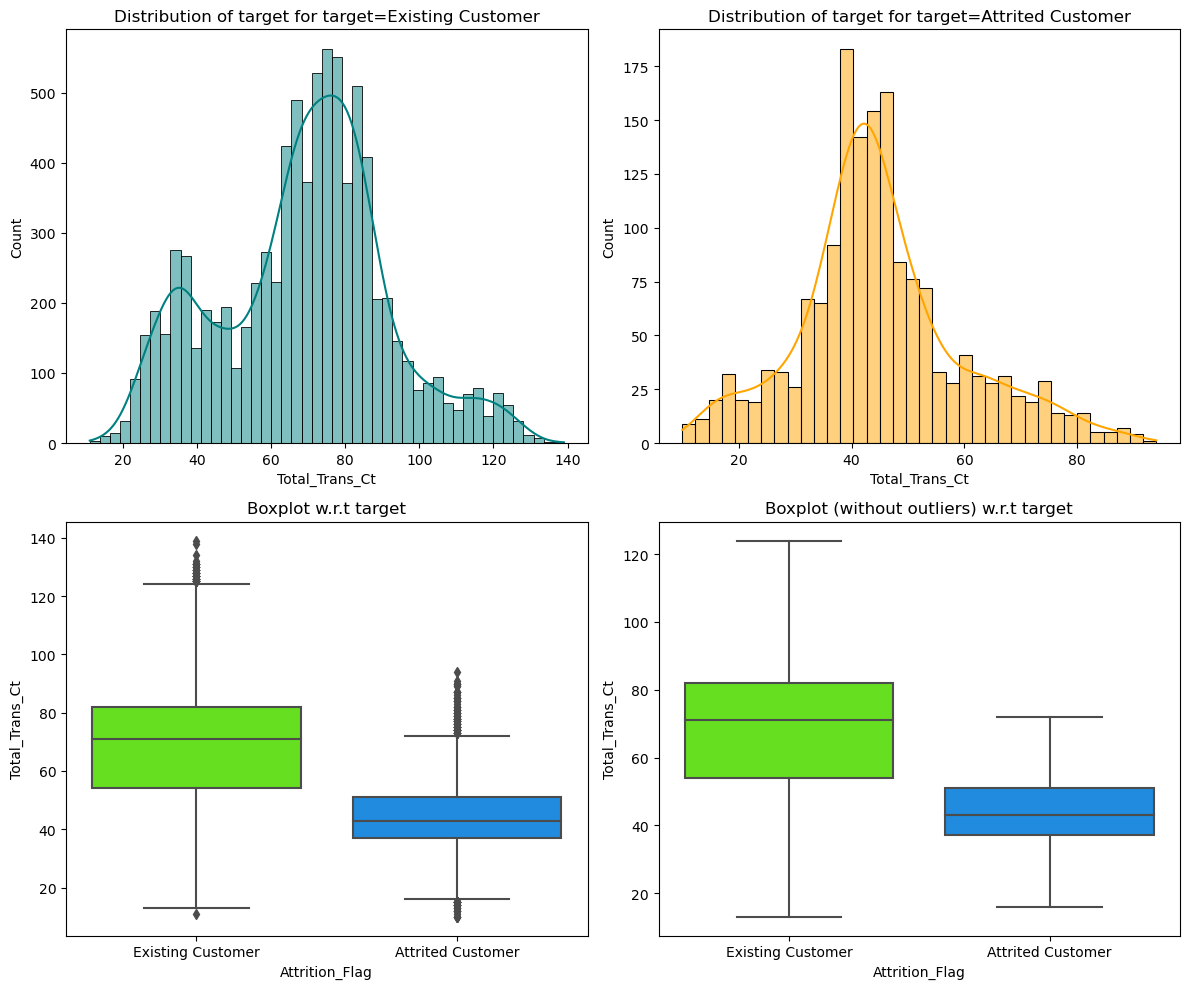

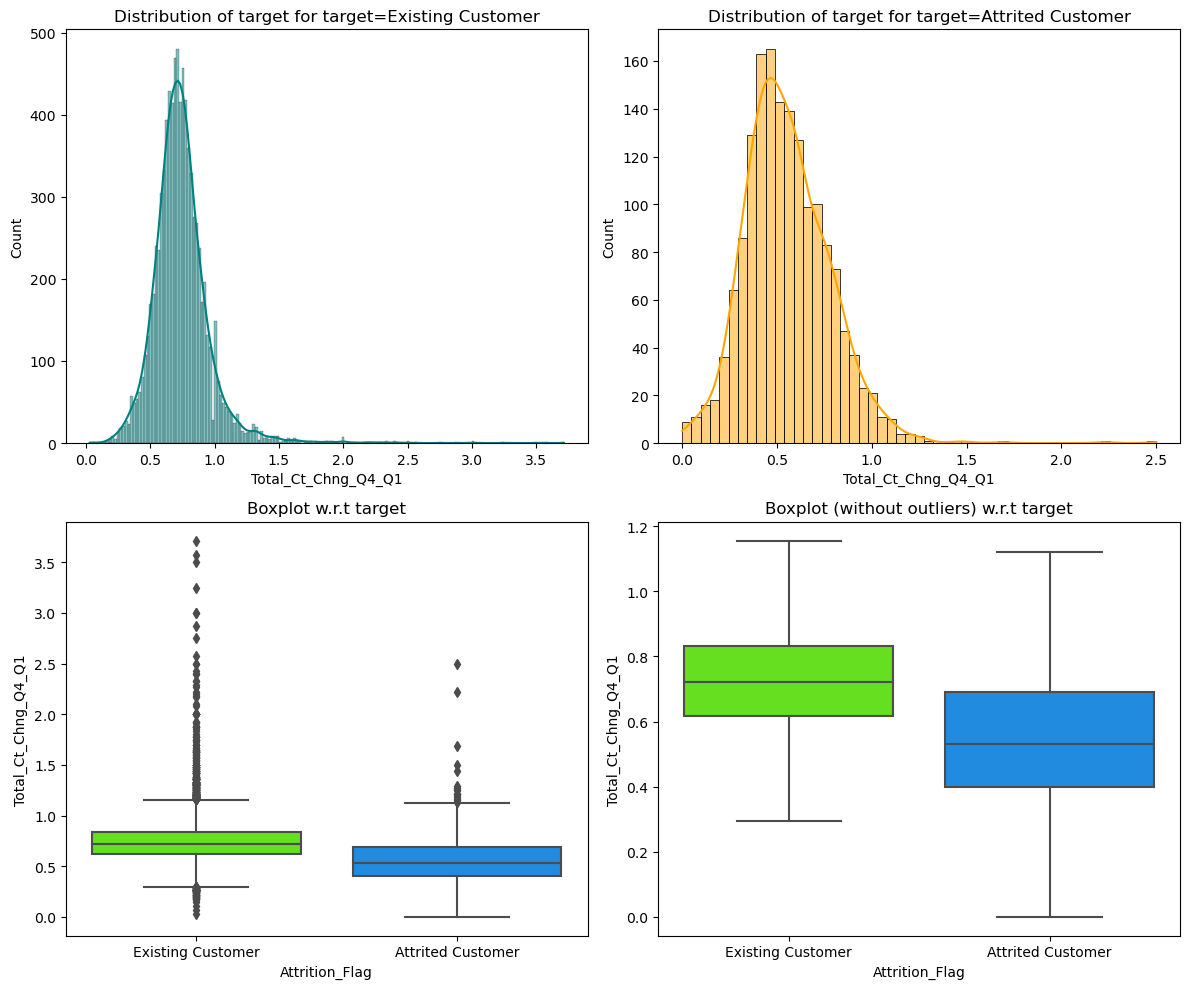

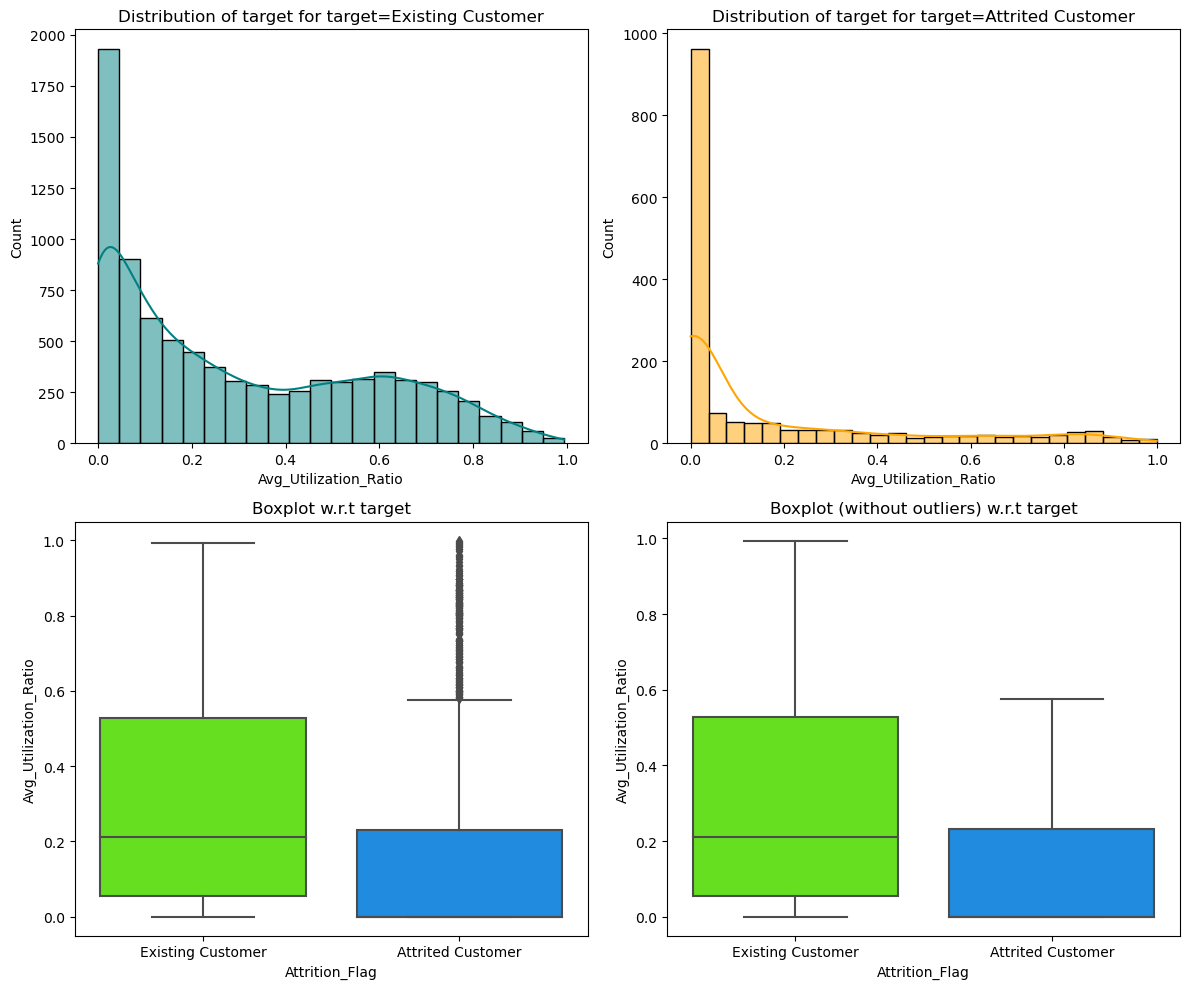

In [34]:
continuous_variables = ['Customer_Age', 'Dependent_count', 
                        'Months_on_book', 'Total_Relationship_Count', 
                        'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
                        'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                        'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct',
                        'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

for continuous in continuous_variables:
    distribution_plot_wrt_target(data, continuous, 'Attrition_Flag')
    


On the variable Total_Relationship_Count (total number of products held by customer), the mean value of Total_Relationship_Count for Attrited Customers is much lower (around 3) than the mean value of Total_Relationship_Count for Existing Customers (around 4). This means that customers with a value of Total_Relationship_Count of less than 3 have a higher chance of becoming an Attrited Customer.

On the variable Total_Revolving_Bal (total revolving balance on credit card), the mean value of Total_Revolving_Bal for Attrited Customers is much lower (around 600) than the mean value of Total_Revolving_Bal for Existing Customers (around 1400). This means that customers with a value of Total_Revolving_Bal of less than 600 have a higher chance of becoming an Attrited Customer. 

On the variable Total_Trans_Amt (Total Transaction Amount (Last 12 months)), the mean value of Total_Trans_Amt for Attrited Customers is much lower (around 2000) than the mean value of Total_Trans_Amt for Existing Customers (around 4000). This means that customers with a value of Total_Trans_Amt of less than 2000 have a higher chance of becoming an Attrited Customer.

On the variable Total_Ct_Chng_Q4_Q1 (Change in Transaction Count (Q4 over Q1)), the mean value of Total_Trans_Amt for Attrited Customers is much lower (around 0.5) than the mean value of Total_Ct_Chng_Q4_Q1 for Existing Customers (around 0.7). This means that customers with a value of Total_Ct_Chng_Q4_Q1 of less than 0.5 have a higher chance of becoming an Attrited Customer.

On the variable Avg_Utilization_Ratio (Average Card Utilization Ratio), the mean value of Avg_Utilization_Ratio for Attrited Customers is much lower (around 0.1) than the mean value of Avg_Utilization_Ratio for Existing Customers (around 0.2). This means that customers with a value of Avg_Utilization_Ratio of less than 0.1 have a higher chance of becoming an Attrited Customer.


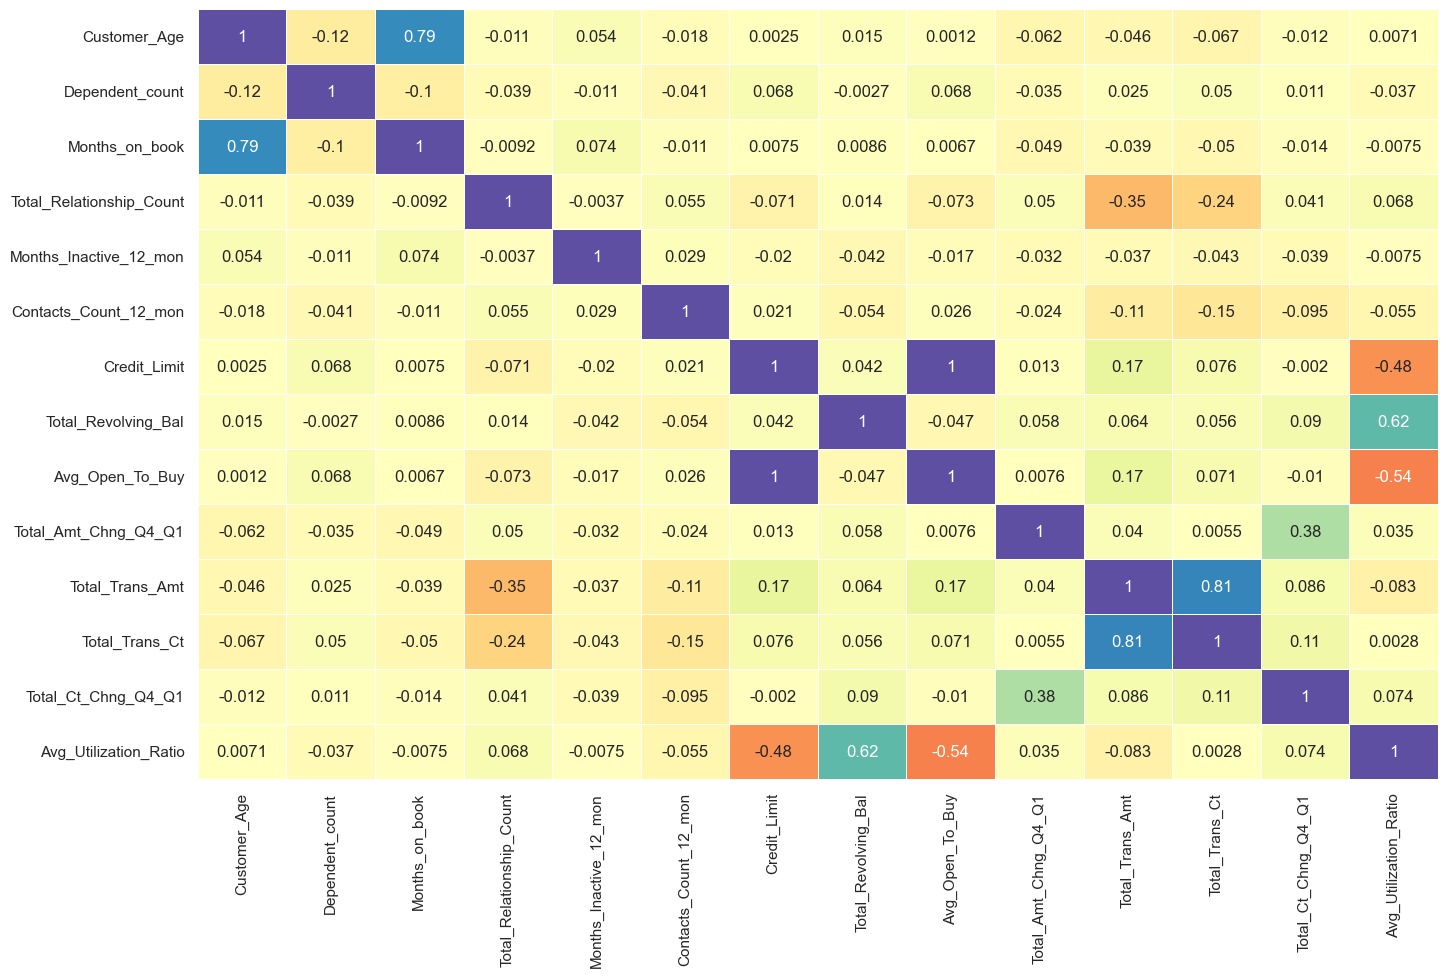

In [35]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(cards.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

Question 6 answer: Total_Trans_Ct and Total_Trans_Amt have a high correlation value of 0.81.
Avg_Utilization_Ratio and Total_Revolving_Balance have a moderate correlation value of 0.62.

Total_Trans_Ct will be dropped from the columns because the correlation value is too high and could affect the models. 

## Data Pre-processing

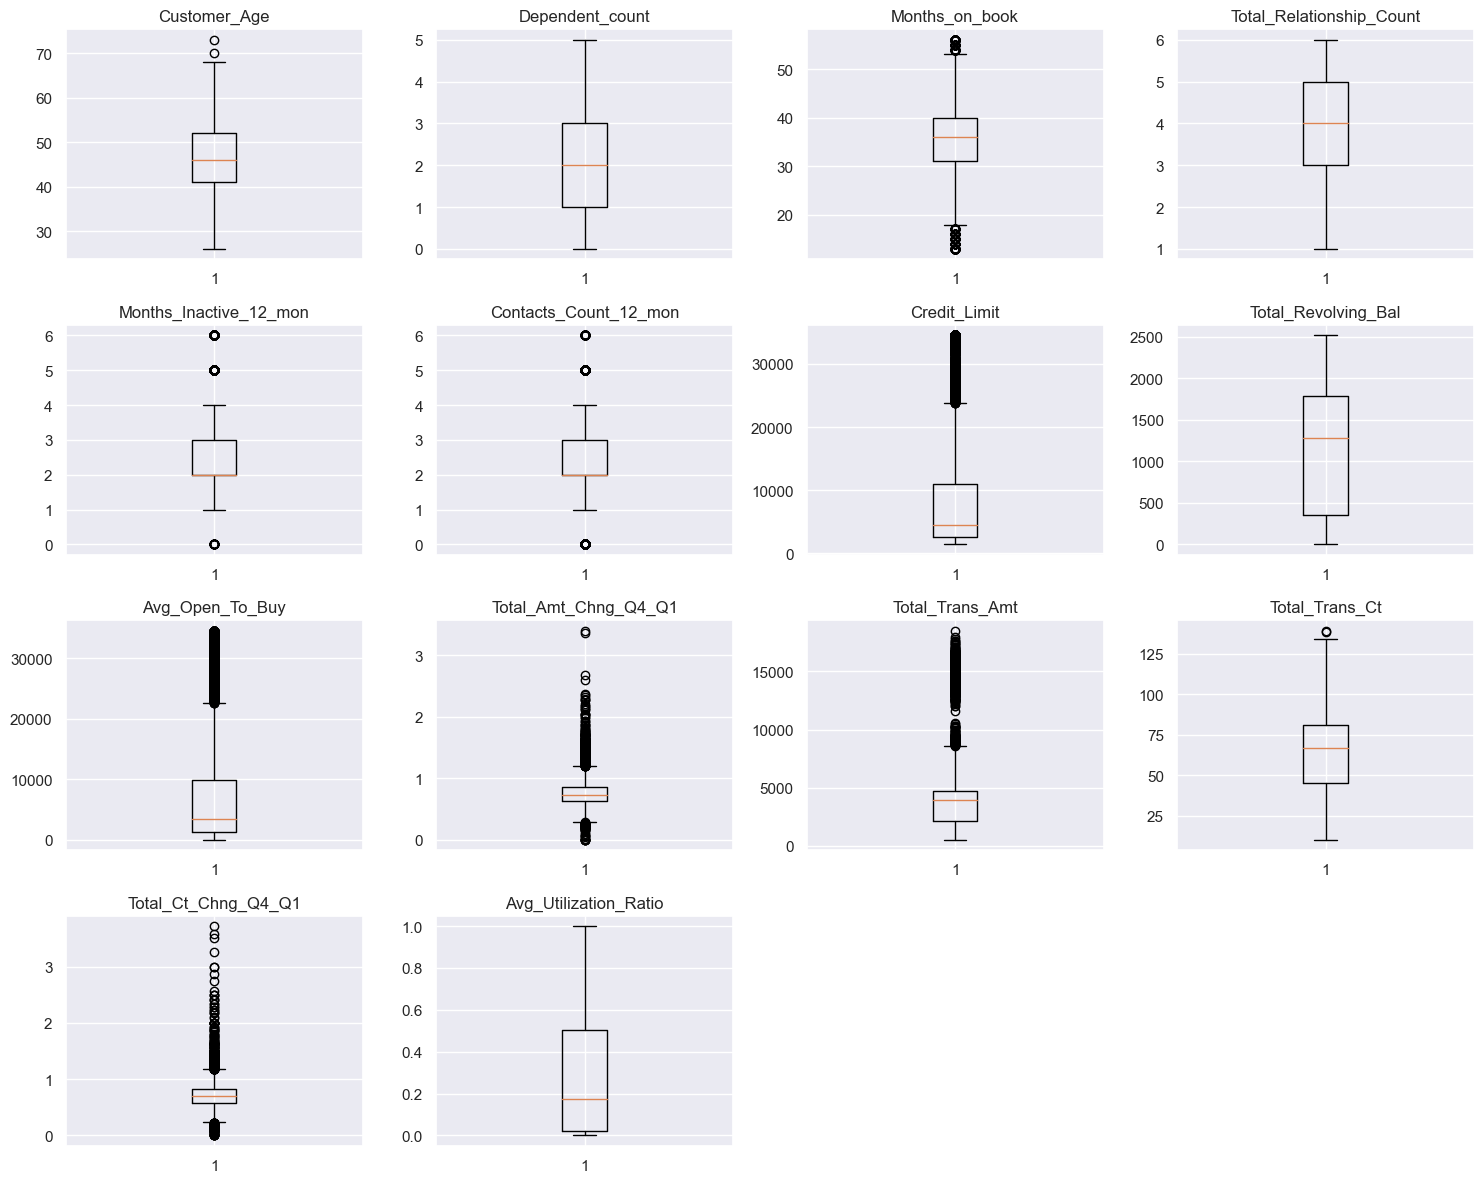

In [36]:
# to find outliers through showing boxplot
numeric_columns = cards.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

The outliers can be observed in a number of variables. However, they will not be removed as they are valid data information. 

In [37]:
cards['Education_Level'].value_counts(dropna=False)

Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [38]:
cards['Marital_Status'].value_counts(dropna=False)

Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64

In [39]:
#change categorical variables for imputation into into numerical values
Education_Level = {
    "Doctorate": 0,
    "Post-Graduate": 1,
    "Graduate": 2,
    "College": 3,
    "High School": 4,
    "Uneducated": 5
}
cards["Education_Level"] = cards["Education_Level"].map(Education_Level)

Marital_Status = {
    "Married": 0,
    "Single": 1,
    "Divorced": 2
}
cards["Marital_Status"] = cards["Marital_Status"].map(Marital_Status)

In [40]:
#drop the y variable Attrition_Flag the highly correlated column Total_Trans_Ct
X = cards.drop(['Attrition_Flag','Total_Trans_Ct'],axis=1)


y = data['Attrition_Flag'].apply(lambda x : 1 if x=='Attrited Customer' else 0)

In [35]:
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,4.000,0.000,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,1.625,0.061
1,49,F,5,2.000,1.000,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,3.714,0.105
2,51,M,3,2.000,0.000,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,2.333,0.000
3,40,F,4,4.000,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,2.333,0.760
4,40,M,3,5.000,0.000,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,2.500,0.000


In [41]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [42]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 18) (2026, 18) (2026, 18)


In [43]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


## Missing value imputation




In [44]:
cards.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [45]:
# steps to impute missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ["Education_Level", "Marital_Status"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

In [46]:
#checking for presence of any missing values in X_train X_val and X_test
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy           

In [47]:
# Create dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 24) (2026, 24) (2026, 24)


In [48]:
X_train.head()

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40,2,2.000,1.000,21,6,4,3,20056.000,1602,18454.000,0.466,1687,0.533,0.080,1,0,0,0,0,0,0,0,0
498,44,1,2.000,0.000,34,6,2,0,2885.000,1895,990.000,0.387,1366,0.632,0.657,1,0,0,0,0,1,0,0,0
4356,48,4,4.000,0.000,36,5,1,2,6798.000,2517,4281.000,0.873,4327,0.881,0.370,1,0,0,1,0,0,0,0,0
407,41,2,2.000,0.000,36,6,2,0,27000.000,0,27000.000,0.610,1209,0.300,0.000,1,0,1,0,0,0,0,0,1
8728,46,4,4.000,2.000,36,2,2,3,15034.000,1356,13678.000,0.754,7737,0.750,0.090,1,1,0,0,0,0,0,0,1


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [49]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [50]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
## Complete the code to append remaining 3 models in the list models
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9774590163934426
Random forest: 1.0
GBM: 0.819672131147541
Adaboost: 0.764344262295082
dtree: 1.0

Validation Performance:

Bagging: 0.8159509202453987
Random forest: 0.7392638036809815
GBM: 0.8404907975460123
Adaboost: 0.7668711656441718
dtree: 0.7515337423312883


In [51]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9775, Validation Score: 0.8160, Difference: 0.1615
Random forest: Training Score: 1.0000, Validation Score: 0.7393, Difference: 0.2607
GBM: Training Score: 0.8197, Validation Score: 0.8405, Difference: -0.0208
Adaboost: Training Score: 0.7643, Validation Score: 0.7669, Difference: -0.0025
dtree: Training Score: 1.0000, Validation Score: 0.7515, Difference: 0.2485


GBM is the best performing model, followed by Adaboost as the next. The criteria is chosen by minimising the training and validation performance difference to reduce overfitting. Secondly, the absolute values of the validatoin score of the model should be maximised for a higher recall score. 

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
#sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
#X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [52]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 24)
After Oversampling, the shape of train_y: (10198,) 



In [53]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9968621298293783
Random forest: 1.0
GBM: 0.9672484800941361
Adaboost: 0.9423416356148264
dtree: 1.0

Validation Performance:

Bagging: 0.8466257668711656
Random forest: 0.8128834355828221
GBM: 0.8803680981595092
Adaboost: 0.8496932515337423
dtree: 0.7883435582822086


In [54]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9969, Validation Score: 0.8466, Difference: 0.1502
Random forest: Training Score: 1.0000, Validation Score: 0.8129, Difference: 0.1871
GBM: Training Score: 0.9672, Validation Score: 0.8804, Difference: 0.0869
Adaboost: Training Score: 0.9423, Validation Score: 0.8497, Difference: 0.0926
dtree: Training Score: 1.0000, Validation Score: 0.7883, Difference: 0.2117


GBM is the best performing model, followed by Adaboost as the next. The criteria is chosen by minimising the training and validation performance difference to reduce overfitting. Secondly, the absolute values of the validatoin score of the model should be maximised for a higher recall score. 

### Model Building with Undersampled data

In [55]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [51]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 24)
After Under Sampling, the shape of train_y: (1952,) 



In [56]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.992827868852459
Random forest: 1.0
GBM: 0.9733606557377049
Adaboost: 0.923155737704918
dtree: 1.0

Validation Performance:

Bagging: 0.9079754601226994
Random forest: 0.9202453987730062
GBM: 0.9478527607361963
Adaboost: 0.911042944785276
dtree: 0.8834355828220859


In [57]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9928, Validation Score: 0.9080, Difference: 0.0849
Random forest: Training Score: 1.0000, Validation Score: 0.9202, Difference: 0.0798
GBM: Training Score: 0.9734, Validation Score: 0.9479, Difference: 0.0255
Adaboost: Training Score: 0.9232, Validation Score: 0.9110, Difference: 0.0121
dtree: Training Score: 1.0000, Validation Score: 0.8834, Difference: 0.1166


GBM is the best performing model, followed by Adaboost as the next. The criteria is chosen by minimising the training and validation performance difference to reduce overfitting. Secondly, the absolute values of the validatoin score of the model should be maximised for a higher recall score. 

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Sample tuning method for Decision tree with original data

In [58]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.6127106227106227:


In [59]:
org_dtree = DecisionTreeClassifier(
    random_state=1,
    max_depth= 5,
    min_samples_leaf= 7,
    max_leaf_nodes = 15,
    min_impurity_decrease= 0.0001
)
org_dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [60]:
# Checking model's performance on training set
org_dtree_train = model_performance_classification_sklearn(org_dtree, X_train, y_train)
org_dtree_train

,Accuracy,Recall,Precision,F1
0,0.916,0.652,0.789,0.714


In [61]:
# Checking model's performance on validation set
org_dtree_val = model_performance_classification_sklearn(org_dtree, X_val, y_val)
org_dtree_val

,Accuracy,Recall,Precision,F1
0,0.917,0.672,0.779,0.722


#### Sample tuning method for Decision tree with oversampled data

In [62]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8770428524697416:


In [63]:
tuned_dtree1 = DecisionTreeClassifier(
    random_state=1,
    max_depth= 5,
    min_samples_leaf= 7,
    max_leaf_nodes = 15,
    min_impurity_decrease= 0.0001
)
tuned_dtree1.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [64]:
# Checking model's performance on training set
tuned_dtree1_train = model_performance_classification_sklearn(tuned_dtree1, X_train_over, y_train_over)
tuned_dtree1_train

,Accuracy,Recall,Precision,F1
0,0.891,0.894,0.888,0.891


In [65]:
# Checking model's performance on validation set
tuned_dtree1_val = model_performance_classification_sklearn(tuned_dtree1, X_val, y_val)
tuned_dtree1_val

,Accuracy,Recall,Precision,F1
0,0.879,0.877,0.582,0.700


#### Sample tuning method for Decision tree with undersampled data

In [66]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8801151229722659:


In [67]:
tuned_dtree2 = DecisionTreeClassifier(
    random_state=1,
    max_depth= 5,
    min_samples_leaf= 7,
    max_leaf_nodes = 15,
    min_impurity_decrease= 0.0001
)
tuned_dtree2.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [68]:
# Checking model's performance on training set
tuned_dtree2_train = model_performance_classification_sklearn(tuned_dtree2, X_train_un, y_train_un)
tuned_dtree2_train

,Accuracy,Recall,Precision,F1
0,0.905,0.901,0.908,0.904


In [69]:
# Checking model's performance on validation set
tuned_dtree2_val = model_performance_classification_sklearn(tuned_dtree2, X_val, y_val)
tuned_dtree2_val

,Accuracy,Recall,Precision,F1
0,0.880,0.905,0.582,0.708


In [70]:
#Tuning adaboost model using undersampled data

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 20, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9252066980638409:


In [71]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1, n_estimators=20, random_state=1)

In [72]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.978,0.981,0.977,0.979


In [73]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.909,0.929,0.653,0.767


In [74]:
#Tuning Gradient boosting model using undersampled data

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9384877027734172:


In [75]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=125,
    max_features=0.5,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.9)

In [76]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.990,0.995,0.986,0.990


In [77]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.932,0.954,0.718,0.819


In [78]:
#Tuning Gradient boosting model using oversampled data

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.9168560103138409:


In [79]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=1,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.5, random_state=1,
                           subsample=1)

In [80]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.950,0.957,0.944,0.950


In [81]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.932,0.954,0.718,0.819


## Model Comparison and Final Model Selection

In [82]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        org_dtree_train.T,
        tuned_dtree1_train.T,
        tuned_dtree2_train.T,
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Untuned Decision Tree trained with normal data",
    "Tuned Decision Tree trained with Oversampled data",
    "Tuned Decision Tree trained with Undersampled data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Untuned Decision Tree trained with normal data,Tuned Decision Tree trained with Oversampled data,Tuned Decision Tree trained with Undersampled data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.916,0.891,0.905,0.990,0.950,0.978
Recall,0.652,0.894,0.901,0.995,0.957,0.981
Precision,0.789,0.888,0.908,0.986,0.944,0.977
F1,0.714,0.891,0.904,0.990,0.950,0.979


In [83]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ org_dtree_train.T,
        tuned_dtree1_train.T,
        tuned_dtree2_train.T,
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T
    ], axis=1,
)
models_train_comp_df.columns = [
    "Untuned Decision Tree trained with normal data",
    "Tuned Decision Tree trained with Oversampled data",
    "Tuned Decision Tree trained with Undersampled data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data"
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Untuned Decision Tree trained with normal data,Tuned Decision Tree trained with Oversampled data,Tuned Decision Tree trained with Undersampled data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.916,0.891,0.905,0.990,0.950,0.978
Recall,0.652,0.894,0.901,0.995,0.957,0.981
Precision,0.789,0.888,0.908,0.986,0.944,0.977
F1,0.714,0.891,0.904,0.990,0.950,0.979


GB Model with undersampled data is the best model to choose as it has the highest recall. Also, GB Model underesampled does not display overfitting because the recall values are similar for training and validation performance. The second best model is  GB Model underesampled as it has the second highest recall value. 

### Test set final performance

In [84]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.942,0.954,0.752,0.841


In [85]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.942,0.954,0.752,0.841


The performance on training and test set recall score is also 0.954, similar to the recall score in training and validation set. This means the GB Model with undersampled performed well on training and validation evaluation on the final test set performance evaluation.  There is no overfitting observed. 

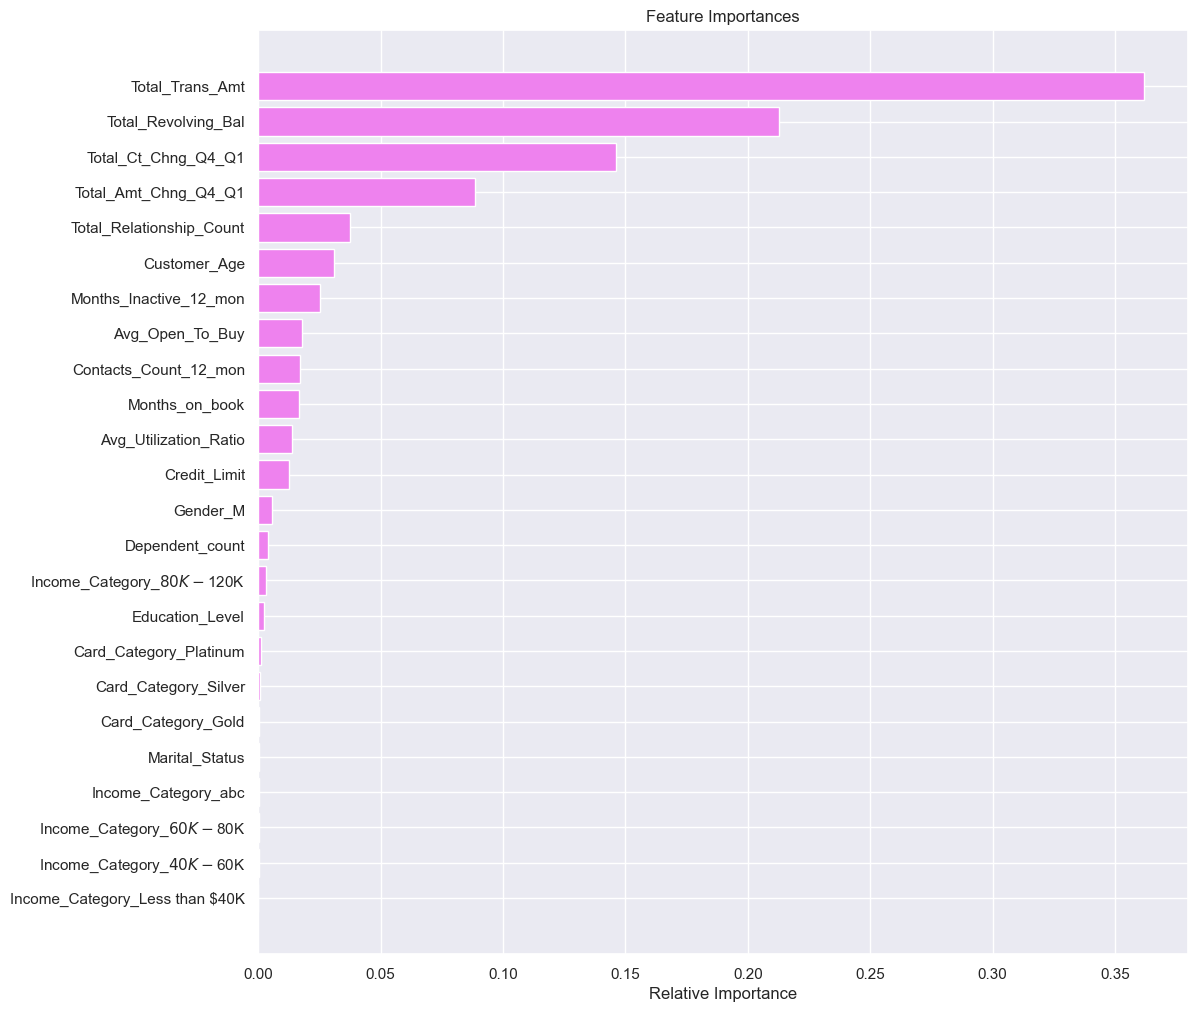

In [86]:
feature_names = X_train.columns
importances = tuned_gbm1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The top 5 most important features for making predictions are Total_Trans_Amt, Total_Revolving_Bal, Total_Ct_Chng_Q4_Q1,  Total_Amt_Chng_Q4_Q1, Total_Relationship_Count. 

# Business Insights and Conclusions